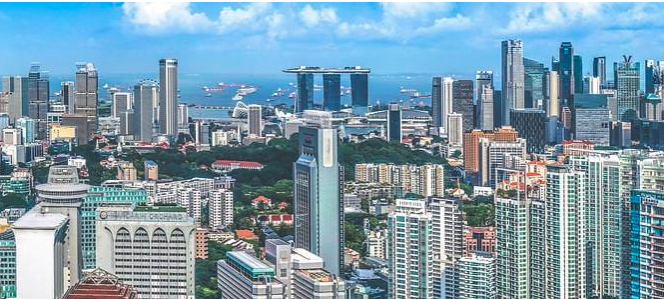

# Mini Project 1 - HDB Resale Transaction Information (EDA)

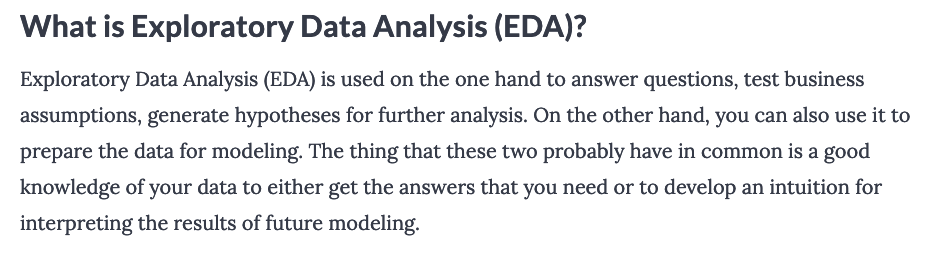

# Understanding the given dataset

In [35]:
# EXPLORE THE CODEBOOK SO WE KNOW WHAT OUR DATA MEANS
f = open("metadata-resale-flat-prices.txt", "r")
print(f.read()) 

# Metadata for Resale Flat Prices
---
Identifier: '7a339d20-3c57-4b11-a695-9348adfd7614'
Name: 'resale-flat-prices'
Title: 'Resale Flat Prices'
Description:
  - 'Resale transacted prices.'
  - 'Prior to March 2012, data is based on date of approval for the resale transactions.'
  - 'For March 2012 onwards, the data is based on date of registration for the resale
    transactions.'
Topics:
  - 'Infrastructure'
Keywords:
  - 'Cost of Living'
  - 'HDB'
  - 'Housing'
  - 'Property'
  - 'Public Housing'
  - 'Resale Flats'
Publisher:
  Name: 'Housing and Development Board'
  Admin 1:
    Name: 'Michelle Tay'
    Department: 'HDB'
    Email: 'Michelle_MB_TAY@hdb.gov.sg'
  Admin 2:
    Name: 'Toh Xue Qin'
    Department: 'HDB'
    Email: 'toh_xue_qin@hdb.gov.sg'
Sources:
  - 'Housing and Development Board'
License: 'https://data.gov.sg/open-data-licence'
Frequency: 'Monthly'
Coverage: '1990-01-01 to 2021-06-16'
Last Updated: '2021-06-17T03:54:12.905463'
Resources:
  -
    Identifier: '42ff9cfe

# Packages and setup

In [1]:
#import libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

import pandas_profiling as pp
from pandas import DataFrame
import seaborn as sns

from pandas_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer, StandardScaler
#from sklearn.preprocessing.data import normalize

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import f_classif, chi2, mutual_info_classif, SelectKBest

import warnings #to ignore non-fatal depracated warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline

# Data wranging/munging

In [43]:
#import all df

df1 = pd.read_csv('resale-flat-prices-based-on-approval-date-1990-1999.csv')
df2 = pd.read_csv('resale-flat-prices-based-on-approval-date-2000-feb-2012.csv')
df3 = pd.read_csv('resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv')
df4 = pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv')
df5 = pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')

dflist = [df1,df2,df3,df4,df5]

In [44]:
for idx,df in enumerate(dflist):
    display(df.head())

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [45]:
for idx,df in enumerate(dflist):
    display(df.shape)

(287196, 10)

(369651, 10)

(52203, 10)

(37153, 11)

(100225, 11)

*** 
We drop remaining_lease col from the df's that have them as it is in different formats. Will be able to create the feature col later with available information`
***

In [46]:
for idx,df in enumerate(dflist):
     if 'remaining_lease' in df:
            dflist[idx] = df.drop(['remaining_lease'],axis=1)

In [47]:
for idx,df in enumerate(dflist):
    display(df.head())

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,290000.0


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,265000.0


***
df's are merged into 1 df
***

In [48]:
dfmerged = pd.concat(dflist)

In [49]:
dfmerged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 846428 entries, 0 to 100224
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                846428 non-null  object 
 1   town                 846428 non-null  object 
 2   flat_type            846428 non-null  object 
 3   block                846428 non-null  object 
 4   street_name          846428 non-null  object 
 5   storey_range         846428 non-null  object 
 6   floor_area_sqm       846428 non-null  float64
 7   flat_model           846428 non-null  object 
 8   lease_commence_date  846428 non-null  int64  
 9   resale_price         846428 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 71.0+ MB


***
Format relevant cols here to timeseries, and also re-introduce the remaining_lease col. While dropping unnecessary cols
***

In [50]:
#we can assume the transaction happened on the 1st of the month
dfmerged['month'] = pd.to_datetime(dfmerged['month'],format='%Y-%m')

In [51]:
dfmerged['lease_commence_date'] = pd.to_datetime(dfmerged['lease_commence_date'],format='%Y')

In [52]:
dfmerged['lease_commence_date'] = pd.to_datetime(dfmerged['lease_commence_date'].dt.date)

In [53]:
dfmerged['remaining_lease'] = dfmerged['month'] - dfmerged['lease_commence_date']

In [54]:
dfmerged['remaining_lease'] = 99 - dfmerged['remaining_lease'] / np.timedelta64(1, 'Y')

In [55]:
dfmerged['remaining_lease'] = dfmerged['remaining_lease'].astype(int)

In [56]:
dfmerged["floor_area_sqft"] = dfmerged["floor_area_sqm"]*10.7639

In [57]:
#create a new feature column price per square foot as this is what we look at in singapore
dfmerged["price_psqft"] = dfmerged["resale_price"]/(dfmerged["floor_area_sqft"])

In [58]:
#convert back to string
dfmerged['lease_commence_date'] = dfmerged['lease_commence_date'].dt.strftime('%Y-%m-%d')

In [59]:
del dfmerged["floor_area_sqm"]

In [60]:
dfmerged.rename(columns={'month': 'date'}, inplace=True)

In [61]:
dfmerged.head(1)

,date,town,flat_type,block,street_name,storey_range,flat_model,lease_commence_date,resale_price,remaining_lease,floor_area_sqft,price_psqft
0,1990-01-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,IMPROVED,1977-01-01,9000.0,86,333.6809,26.971876


In [62]:
#set index to date
dfmerged.set_index('date', inplace=True)

In [63]:
#lowercase all str col. when we factorize this will keep the keys consistent
for col in dfmerged:
    if dfmerged[col].dtype == 'object':
        print(col)
        dfmerged[col] = dfmerged[col].astype(str).str.lower() 

town
flat_type
block
street_name
storey_range
flat_model
lease_commence_date


https://www.hdb.gov.sg/residential/selling-a-flat/eligibility
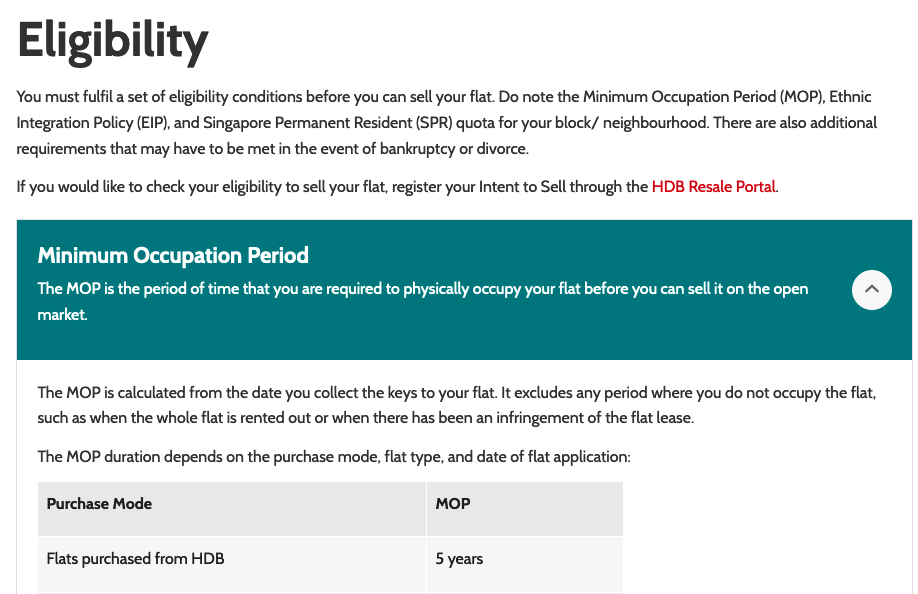

There are multiple schemes where flats can only be resold after 5 years occupancy. As there is not enough information on each entry, we will just remove all of those with more tan more than 94 year remaining lease

In [64]:
#logically we should not have any remaining lease over 94 years after 2010. before 2010 should be 96.5 (2.5 years MOP)
dfmerged[dfmerged['remaining_lease']>96]

,town,flat_type,block,street_name,storey_range,flat_model,lease_commence_date,resale_price,remaining_lease,floor_area_sqft,price_psqft
date,,,,,,,,,,,
1990-09-01,yishun,4 room,778,yishun ave 2,01 to 03,model a,1989-01-01,85000.0,97,1130.2095,75.207296
1991-01-01,jurong west,5 room,835,jurong west st 81,04 to 06,improved,1989-01-01,120000.0,97,1313.1958,91.380128
1991-06-01,jurong west,4 room,749,jurong west st 73,04 to 06,model a,1990-01-01,93000.0,97,1119.4456,83.076837
1991-11-01,bishan,4 room,227,bishan st 23,04 to 06,model a,1992-01-01,135000.0,99,1108.6817,121.766238
1992-01-01,bishan,4 room,242,bishan st 22,07 to 09,model a,1992-01-01,130000.0,99,1248.6124,104.115577
...,...,...,...,...,...,...,...,...,...,...,...
2013-11-01,queenstown,4 room,28a,dover cres,28 to 30,model a,2012-01-01,692000.0,97,1022.5705,676.725957
2013-11-01,queenstown,4 room,28a,dover cres,13 to 15,model a,2012-01-01,710000.0,97,1022.5705,694.328655
2013-12-01,queenstown,4 room,18a,holland dr,22 to 24,model a,2012-01-01,760000.0,97,990.2788,767.460638


In [65]:
dfmerged = dfmerged.loc[~((dfmerged['remaining_lease'] > 96)),:]

In [66]:
dfmerged['remaining_lease'].max()

96

In [67]:
#reorder columns so we can target Y later
dfmerged = dfmerged[['town', 'flat_type', 'block', 'street_name', 'storey_range',
       'flat_model', 'lease_commence_date', 'remaining_lease',
       'floor_area_sqft', 'price_psqft','resale_price']]

In [68]:
#search for duplicates. there are 22.5k duplicates. we should drop the duplicates as it could skew the data
dfmerged[dfmerged.duplicated(keep=False)]

,town,flat_type,block,street_name,storey_range,flat_model,lease_commence_date,remaining_lease,floor_area_sqft,price_psqft,resale_price
date,,,,,,,,,,,
1990-01-01,ang mo kio,3 room,308,ang mo kio ave 1,10 to 12,new generation,1976-01-01,84,721.1813,65.448175,47200.0
1990-01-01,ang mo kio,3 room,247,ang mo kio ave 3,04 to 06,new generation,1978-01-01,86,882.6398,64.465708,56900.0
1990-01-01,ang mo kio,3 room,329,ang mo kio ave 3,07 to 09,new generation,1978-01-01,86,785.7647,50.905825,40000.0
1990-01-01,ang mo kio,3 room,474,ang mo kio ave 10,04 to 06,new generation,1984-01-01,92,721.1813,51.998020,37500.0
1990-01-01,ang mo kio,3 room,611,ang mo kio ave 5,10 to 12,new generation,1980-01-01,88,721.1813,65.170852,47000.0
...,...,...,...,...,...,...,...,...,...,...,...
2021-06-01,punggol,4 room,613d,punggol dr,04 to 06,model a,2012-01-01,89,1001.0427,449.531274,450000.0
2021-06-01,punggol,4 room,315b,punggol way,13 to 15,premium apartment,2017-01-01,94,1001.0427,549.427112,550000.0
2021-06-01,queenstown,3 room,87,dawson rd,31 to 33,premium apartment,2016-01-01,93,699.6535,943.324088,660000.0


In [69]:
dfmerged = dfmerged.drop_duplicates()

In [70]:
dfmerged[dfmerged.duplicated(keep=False)]

,town,flat_type,block,street_name,storey_range,flat_model,lease_commence_date,remaining_lease,floor_area_sqft,price_psqft,resale_price
date,,,,,,,,,,,


rename multi generation to multi-generation. there were 2 categories that were probably the same found

In [71]:
dfmerged['flat_type'].value_counts()

4 room              314371
3 room              270536
5 room              174358
executive            63729
2 room                9896
1 room                1106
multi generation       278
multi-generation       234
Name: flat_type, dtype: int64

In [75]:
dfmerged['flat_type'].replace(to_replace='multi generation', value='multi-generation', inplace=True)

***
categorical pickle stored here
***

In [77]:
#its all added to a backup pickle with the categorical col untouched - after this we will enumerate the categorical data
dfmerged.to_pickle("hdb_1990_2021_categorical_data.pkl")

***
numeric pickle stored after we factorize here
***

In [78]:
#here we factorize object columns and then put the keys and values into a dict so we can later refer
df_dict = {}
for col in dfmerged:
    if dfmerged[col].dtype == 'object':
        key, value = pd.factorize(dfmerged[col]) 
        temp = dict(zip(list(set(key)),list(value)))
        df_dict[col] = temp
        dfmerged[col] = key

In [79]:
dfmerged.dtypes

town                     int64
flat_type                int64
block                    int64
street_name              int64
storey_range             int64
flat_model               int64
lease_commence_date      int64
remaining_lease          int64
floor_area_sqft        float64
price_psqft            float64
resale_price           float64
dtype: object

In [31]:
#check dict
df_dict

{'town': {0: 'ang mo kio',
  1: 'bedok',
  2: 'bishan',
  3: 'bukit batok',
  4: 'bukit merah',
  5: 'bukit timah',
  6: 'central area',
  7: 'choa chu kang',
  8: 'clementi',
  9: 'geylang',
  10: 'hougang',
  11: 'jurong east',
  12: 'jurong west',
  13: 'kallang/whampoa',
  14: 'marine parade',
  15: 'queenstown',
  16: 'sengkang',
  17: 'serangoon',
  18: 'tampines',
  19: 'toa payoh',
  20: 'woodlands',
  21: 'yishun',
  22: 'lim chu kang',
  23: 'sembawang',
  24: 'bukit panjang',
  25: 'pasir ris',
  26: 'punggol'},
 'flat_type': {0: '1 room',
  1: '3 room',
  2: '4 room',
  3: '5 room',
  4: '2 room',
  5: 'executive',
  6: 'multi generation',
  7: 'multi-generation'},
 'block': {0: '309',
  1: '216',
  2: '211',
  3: '202',
  4: '235',
  5: '232',
  6: '308',
  7: '220',
  8: '219',
  9: '247',
  10: '320',
  11: '252',
  12: '223',
  13: '230',
  14: '329',
  15: '313',
  16: '117',
  17: '110',
  18: '343',
  19: '345',
  20: '346',
  21: '121',
  22: '129',
  23: '130',
  2

In [51]:
#saved to csv for easy ref. when you open the .csv in excel or here you will have to delimit the ',' to seperate the values from each other
import csv
w = csv.writer(open("df_dict.csv", "w"))
for key, val in df_dict.items():
    w.writerow([key, val])

In [80]:
#we test access to dict here, flat model 0 should be "improved"
df_dict['flat_model'][0]

'improved'

In [81]:
#save everything in a final pickle file
dfmerged.to_pickle('hdb_final.pkl')

# # EDA with Final DF starts here

In [82]:
#dfmerged = pd.read_pickle('hdb_final.pkl')
df = pd.read_pickle('hdb_final.pkl')
df.shape

(834508, 11)

In [83]:
#here we use the backup df with the category names so we have some better insight into the expensive and cheap properties
df_cat = pd.read_pickle('hdb_1990_2021_categorical_data.pkl')
df_cat.head(1)

,town,flat_type,block,street_name,storey_range,flat_model,lease_commence_date,remaining_lease,floor_area_sqft,price_psqft,resale_price
date,,,,,,,,,,,
1990-01-01,ang mo kio,1 room,309,ang mo kio ave 1,10 to 12,improved,1977-01-01,86,333.6809,26.971876,9000.0


***
find the max and min value sold entries in the dataset to have an understanding of what these properties are like
***

In [84]:
df_cat[df_cat.resale_price == df_cat.resale_price.max()]

,town,flat_type,block,street_name,storey_range,flat_model,lease_commence_date,remaining_lease,floor_area_sqft,price_psqft,resale_price
date,,,,,,,,,,,
2021-06-01,kallang/whampoa,3 room,39,jln bahagia,01 to 03,terrace,1972-01-01,49,2260.419,560.957946,1268000.0


In [85]:
df_expensive = df_cat.loc[((df_cat['resale_price'] > 1000000)),:]

In [86]:
df_expensive.town.value_counts()

central area       112
bishan              68
queenstown          49
toa payoh           38
bukit merah         29
kallang/whampoa     29
bukit timah         13
clementi            11
serangoon            3
ang mo kio           2
geylang              1
Name: town, dtype: int64

***
Highlights points made in the improvement section. The most expensive properties are based in the central area (CBD). This is likely because of proximity to work. There are 12,316 flats in the central area. `112 which makes up 8.5% of HDB flats in this area` have been sold on the resale market for over S$1million
***

https://www.hdb.gov.sg/about-us/history/hdb-towns-your-home/central

In [8]:
df_cat[df_cat.resale_price == df_cat.resale_price.min()]

,town,flat_type,block,street_name,storey_range,flat_model,lease_commence_date,remaining_lease,floor_area_sqft,price_psqft,resale_price
date,,,,,,,,,,,
1990-07-01,bukit merah,1 room,7,telok blangah cres,01 to 03,improved,1975-01-01,83,333.6809,14.984376,5000.0


In [18]:
df.price_psqft.describe()

count    834508.000000
mean        286.368772
std         121.607767
min          14.984376
25%         208.674723
50%         261.290053
75%         357.319730
max        1185.651721
Name: price_psqft, dtype: float64

In [17]:
df.resale_price.median()

280000.0

In [39]:
#descriptive stats
df.describe()

,town,flat_type,block,street_name,storey_range,flat_model,lease_commence_date,remaining_lease,floor_area_sqft,price_psqft,resale_price
count,834508.000000,834508.000000,834508.000000,834508.000000,834508.000000,834508.000000,834508.000000,834508.000000,834508.000000,834508.000000,8.345080e+05
mean,12.536921,2.137651,467.809463,229.885679,2.016931,2.471407,17.005315,80.789007,1031.196745,286.368772,2.991752e+05
std,7.772458,1.125413,456.561376,153.781113,1.986308,3.305829,12.496581,9.988284,279.678506,121.607767,1.518754e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,301.389200,14.984376,5.000000e+03
25%,6.000000,1.000000,166.000000,110.000000,1.000000,0.000000,6.000000,74.000000,785.764700,208.674723,1.850000e+05
50%,12.000000,2.000000,330.000000,213.000000,2.000000,2.000000,16.000000,82.000000,1001.042700,261.290053,2.800000e+05
75%,19.000000,3.000000,597.000000,355.000000,3.000000,2.000000,28.000000,89.000000,1227.084600,357.319730,3.900000e+05
max,26.000000,7.000000,2528.000000,571.000000,24.000000,19.000000,53.000000,96.000000,3304.517300,1185.651721,1.268000e+06


With a varying range of means in each feature and std's we would have to scale the data if we want to model. 

The mean resale price of an HDB on the resale market is S$299k

In [87]:
#use one of the auto EDA tools to begin exploring data
profile = ProfileReport(df, title="HDB Resale History 1990 to 2021", explorative=True)
profile.to_file("HDB_EDA.html")

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

/Users/lawrenceyim/opt/anaconda3/envs/hdb_mini_1/lib/python3.7/site-packages/scipy/stats/stats.py:4594: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [88]:
#find valuecounts for some non-numeric data. we explore both the data HDB_EDA.html created from profiling and valuecounts
print("TOWN V COUNTS ARE")
print('===============')
print(df_cat['town'].value_counts())
print('===============')
print("FLAT TYPE V COUNTS ARE")
print('===============')
print(df_cat['flat_type'].value_counts())
print('===============')
print("FLAT MODEL V COUNTS ARE")
print('===============')
print(df_cat['flat_model'].value_counts())
print('===============')
print("STORY RANGE V COUNTS ARE")
print('===============')
print(df_cat['storey_range'].value_counts())
print('===============')
print("BLOCK V COUNTS ARE")
print('===============')
print(df_cat['block'].value_counts())#block has too many cat types, so we will not use block i our analysis
print('===============')

TOWN V COUNTS ARE
tampines           73779
yishun             63621
bedok              61390
jurong west        60808
woodlands          58882
ang mo kio         47951
hougang            46038
bukit batok        40429
choa chu kang      33964
bukit merah        30752
pasir ris          30610
toa payoh          28537
queenstown         26177
geylang            25810
clementi           25737
sengkang           25504
bukit panjang      24750
kallang/whampoa    24196
jurong east        22979
serangoon          21307
bishan             19823
punggol            13990
sembawang          11223
marine parade       7420
central area        6451
bukit timah         2318
lim chu kang          62
Name: town, dtype: int64
FLAT TYPE V COUNTS ARE
4 room              314371
3 room              270536
5 room              174358
executive            63729
2 room                9896
1 room                1106
multi-generation       512
Name: flat_type, dtype: int64
FLAT MODEL V COUNTS ARE
model a         

As our target variable will be the resale_price we will first analyze that and the price per square ft

Here we will also check for normality after looking at the hist. and then fix for that normality https://www.isixsigma.com/tools-templates/normality/dealing-non-normal-data-strategies-and-tools/


In [43]:
df.price_psqft.max()

1185.6517209505648

In [44]:
df.resale_price.describe()

count    8.345080e+05
mean     2.991752e+05
std      1.518754e+05
min      5.000000e+03
25%      1.850000e+05
50%      2.800000e+05
75%      3.900000e+05
max      1.268000e+06
Name: resale_price, dtype: float64

The mean price for a HDB flat in Singapore seems to be around S$299k

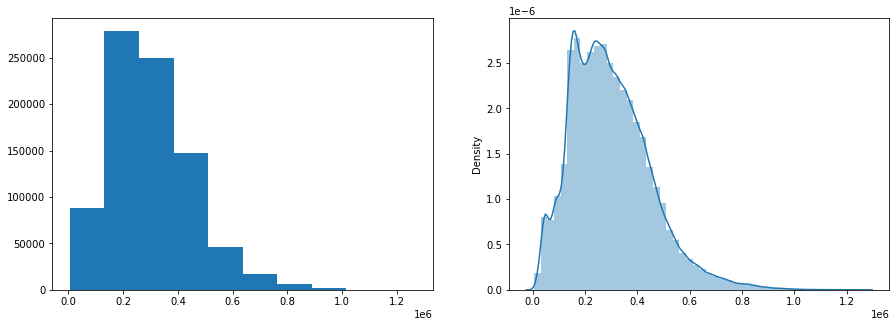

In [45]:
#resale price hist
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].hist(x = df.resale_price)
ax2 = sns.distplot(x = df.resale_price,ax=ax[1])

The mean price/psqft for HDB resales seems to be around $300

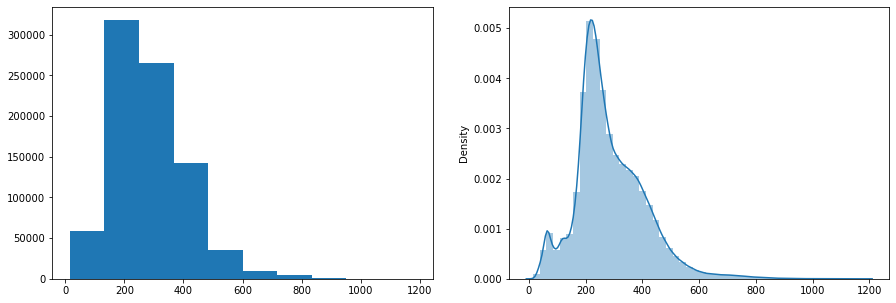

In [46]:
#resale price hist
fig,ax = plt.subplots(1,2,figsize=(15,5))
ax[0].hist(x = df.price_psqft)
ax2 = sns.distplot(x = df.price_psqft,ax=ax[1])

In [47]:
df.describe()

,town,flat_type,block,street_name,storey_range,flat_model,lease_commence_date,remaining_lease,floor_area_sqft,price_psqft,resale_price
count,834508.000000,834508.000000,834508.000000,834508.000000,834508.000000,834508.000000,834508.000000,834508.000000,834508.000000,834508.000000,8.345080e+05
mean,12.536921,2.137651,467.809463,229.885679,2.016931,2.471407,17.005315,80.789007,1031.196745,286.368772,2.991752e+05
std,7.772458,1.125413,456.561376,153.781113,1.986308,3.305829,12.496581,9.988284,279.678506,121.607767,1.518754e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,301.389200,14.984376,5.000000e+03
25%,6.000000,1.000000,166.000000,110.000000,1.000000,0.000000,6.000000,74.000000,785.764700,208.674723,1.850000e+05
50%,12.000000,2.000000,330.000000,213.000000,2.000000,2.000000,16.000000,82.000000,1001.042700,261.290053,2.800000e+05
75%,19.000000,3.000000,597.000000,355.000000,3.000000,2.000000,28.000000,89.000000,1227.084600,357.319730,3.900000e+05
max,26.000000,7.000000,2528.000000,571.000000,24.000000,19.000000,53.000000,96.000000,3304.517300,1185.651721,1.268000e+06


In [48]:
#df.reset_index(inplace=True)

array([[<AxesSubplot:title={'center':'town'}>,
        <AxesSubplot:title={'center':'flat_type'}>,
        <AxesSubplot:title={'center':'block'}>],
       [<AxesSubplot:title={'center':'street_name'}>,
        <AxesSubplot:title={'center':'storey_range'}>,
        <AxesSubplot:title={'center':'flat_model'}>],
       [<AxesSubplot:title={'center':'lease_commence_date'}>,
        <AxesSubplot:title={'center':'remaining_lease'}>,
        <AxesSubplot:title={'center':'floor_area_sqft'}>],
       [<AxesSubplot:title={'center':'price_psqft'}>,
        <AxesSubplot:title={'center':'resale_price'}>, <AxesSubplot:>]],
      dtype=object)

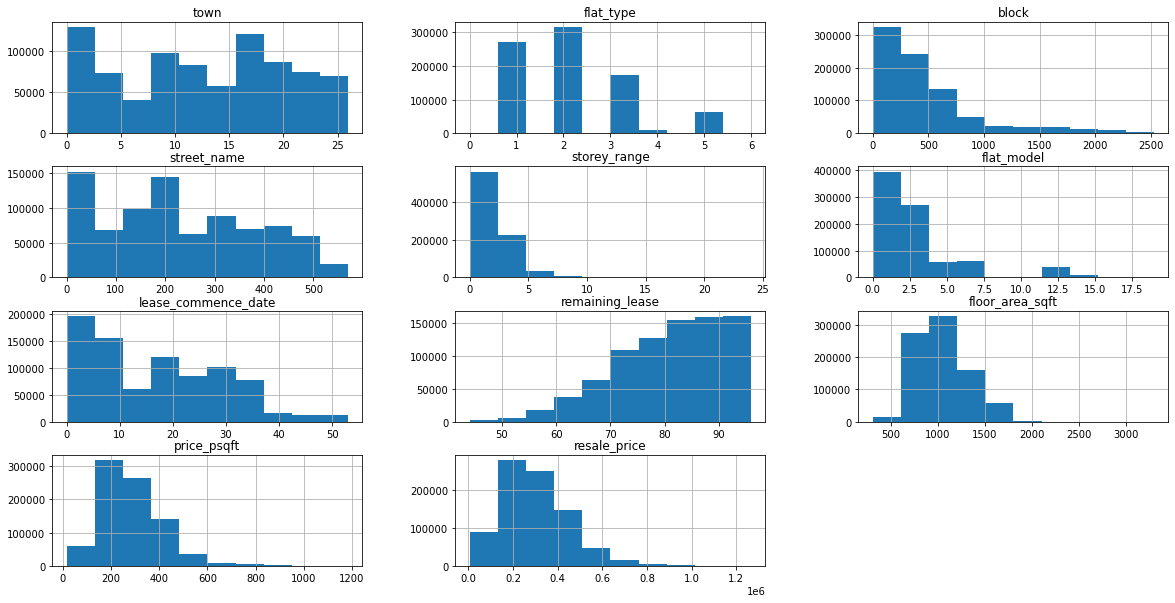

In [89]:
#analysis of all other non-resale transaction price continuous data
df.hist(figsize=(20, 10))

As you can see alot of our inputs dont fit in a normal distribution. later on we would have to preprocess the data with standard scaler

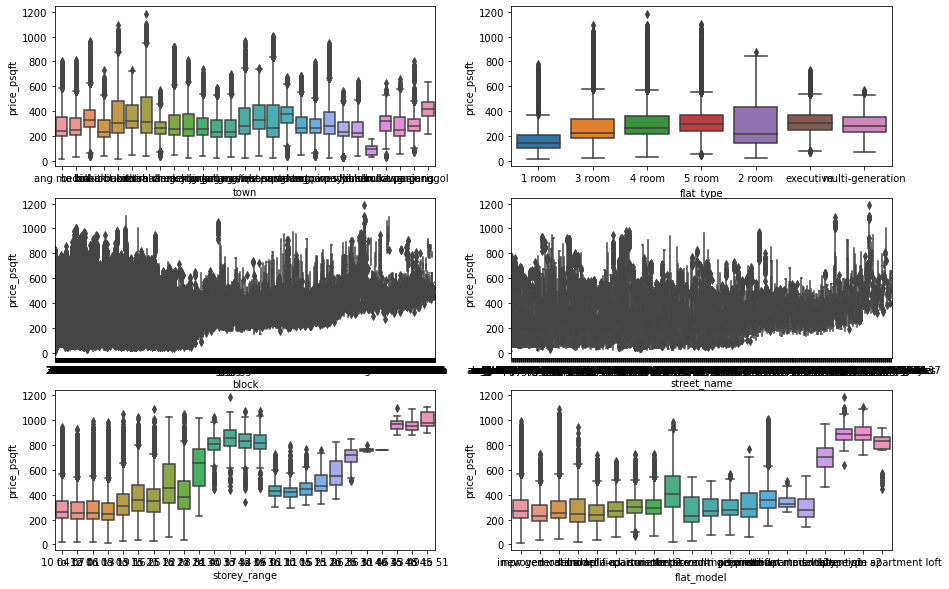

In [90]:
#here we use the backup df with the category names so we have some better insight
df_cat = pd.read_pickle('hdb_1990_2021_categorical_data.pkl')
categorical = ['town', 'flat_type', 'block', 'street_name', 'storey_range', 'flat_model']
fig, ax = plt.subplots(3, 2, figsize=(15, 10))
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=var, y='price_psqft', data=df_cat, ax=subplot)

<AxesSubplot:xlabel='town', ylabel='price_psqft'>

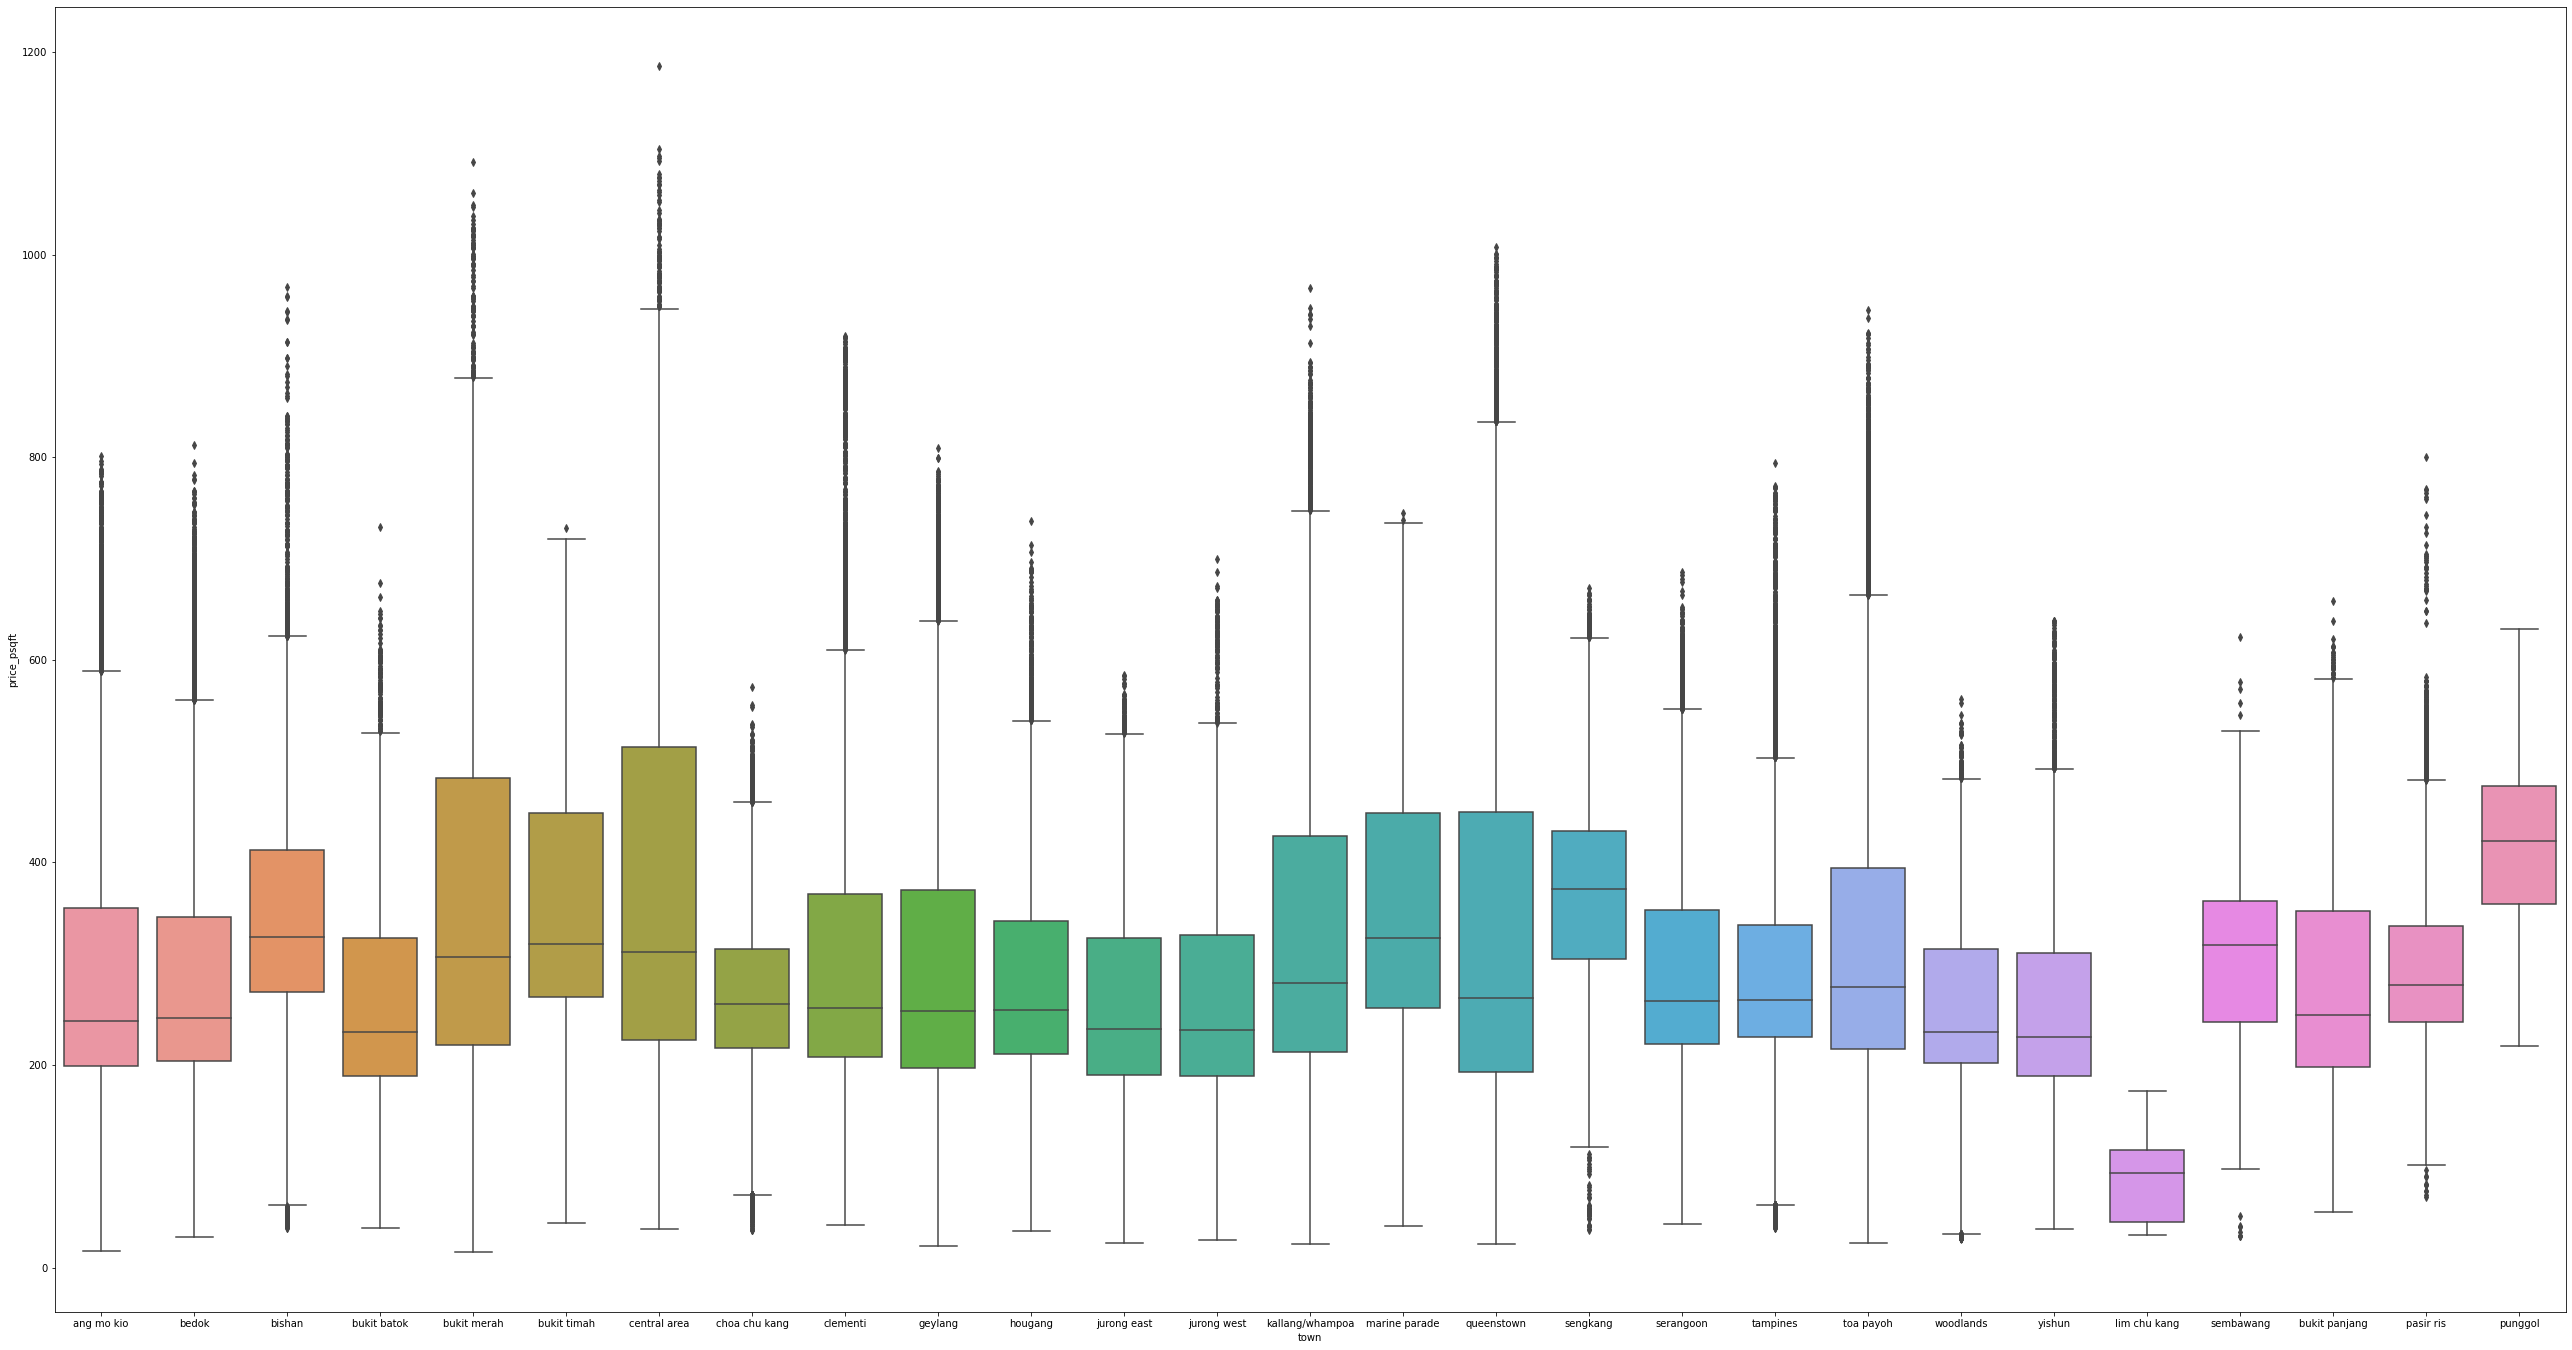

In [21]:
sns.boxplot(x='town', y='price_psqft', data=df_cat)

<AxesSubplot:xlabel='flat_type', ylabel='price_psqft'>

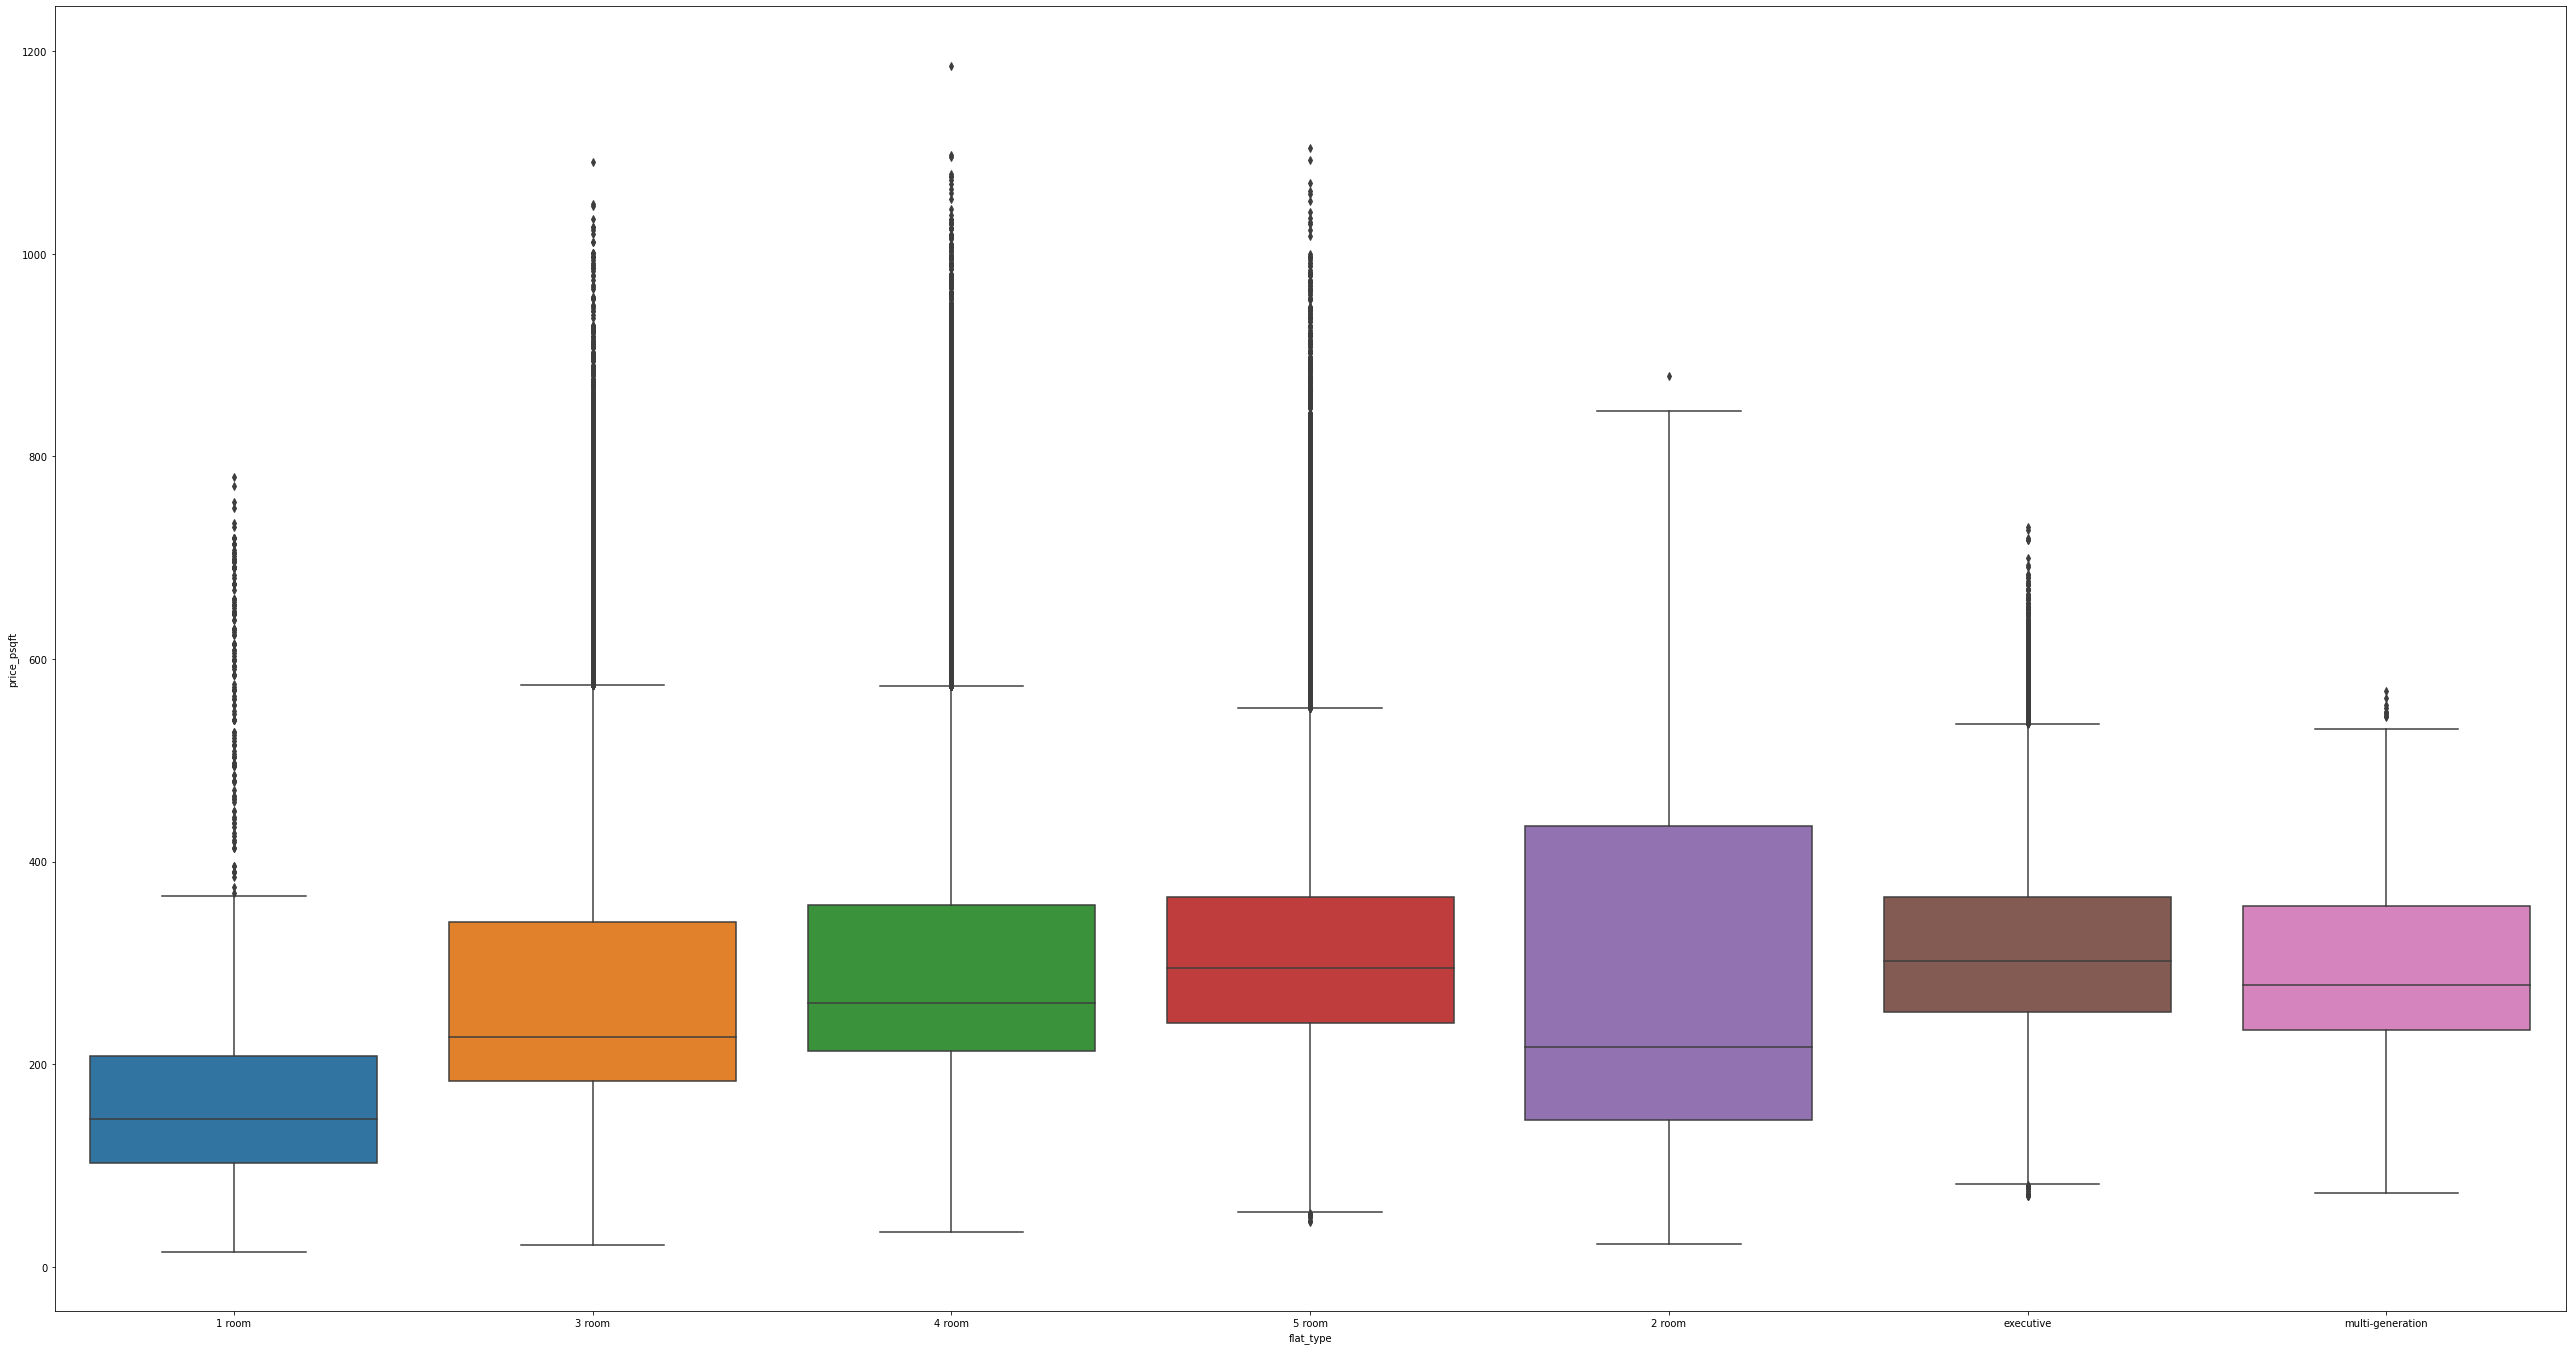

In [91]:
sns.boxplot(x='flat_type', y='price_psqft', data=df_cat)

<AxesSubplot:xlabel='storey_range', ylabel='price_psqft'>

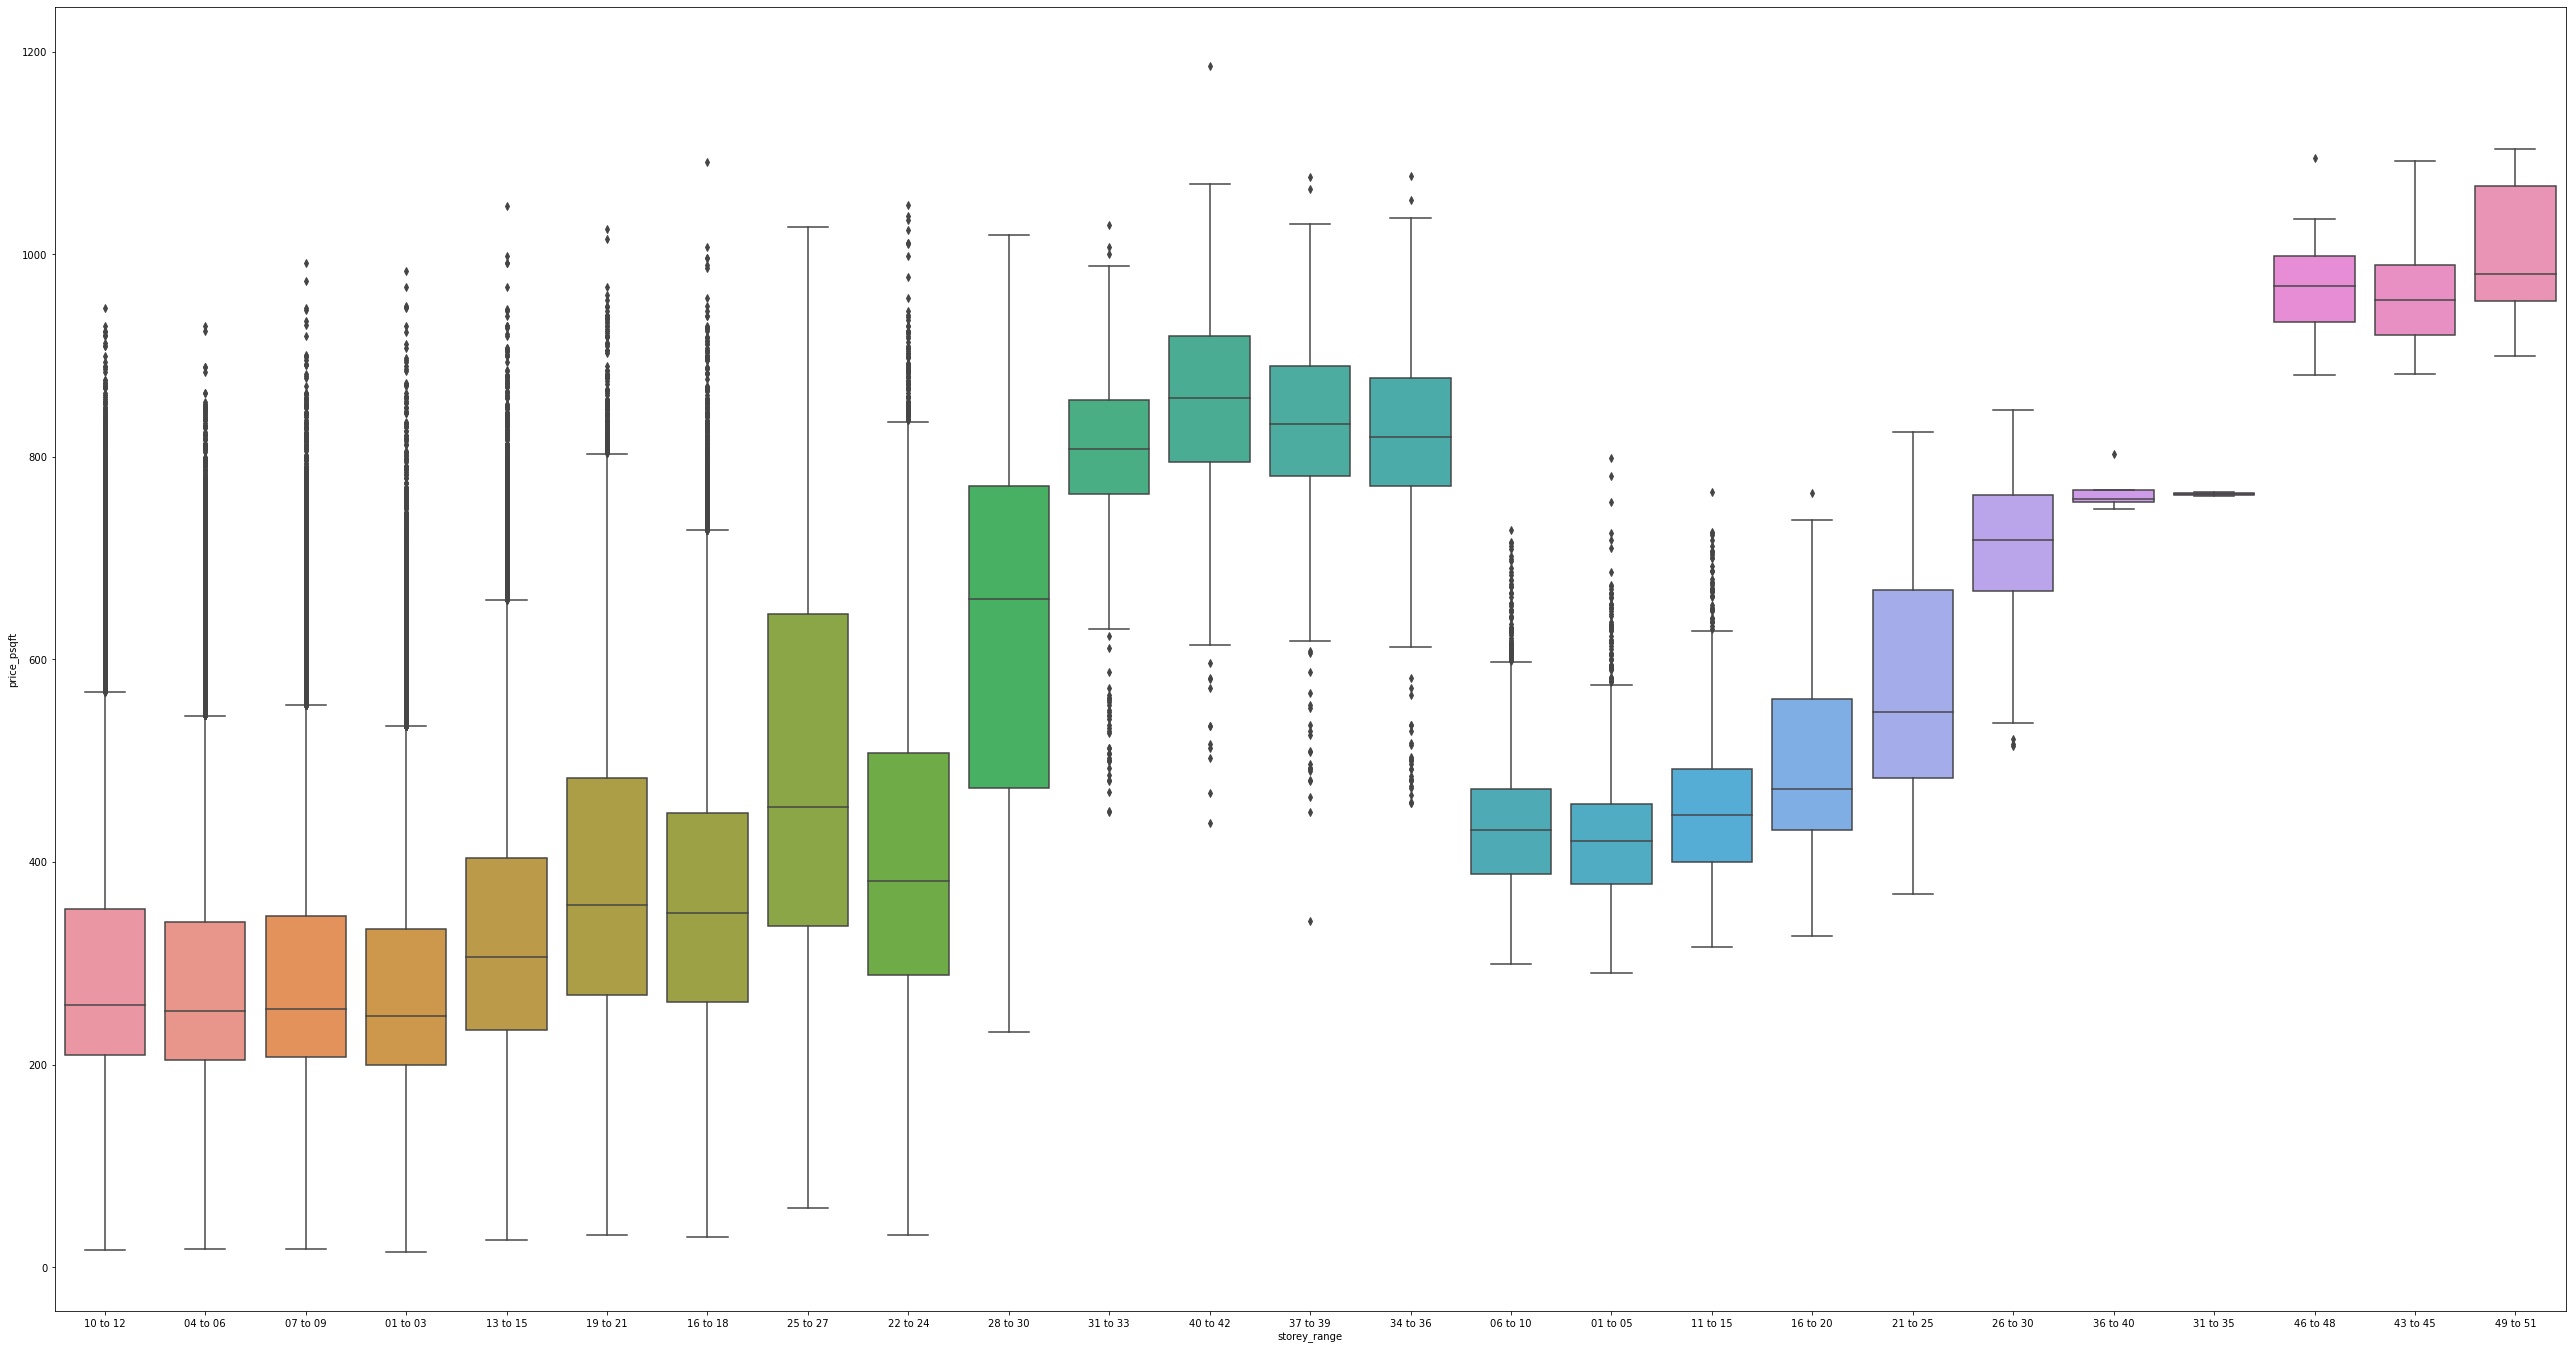

In [23]:
sns.boxplot(x='storey_range', y='price_psqft', data=df_cat)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 9.06 µs


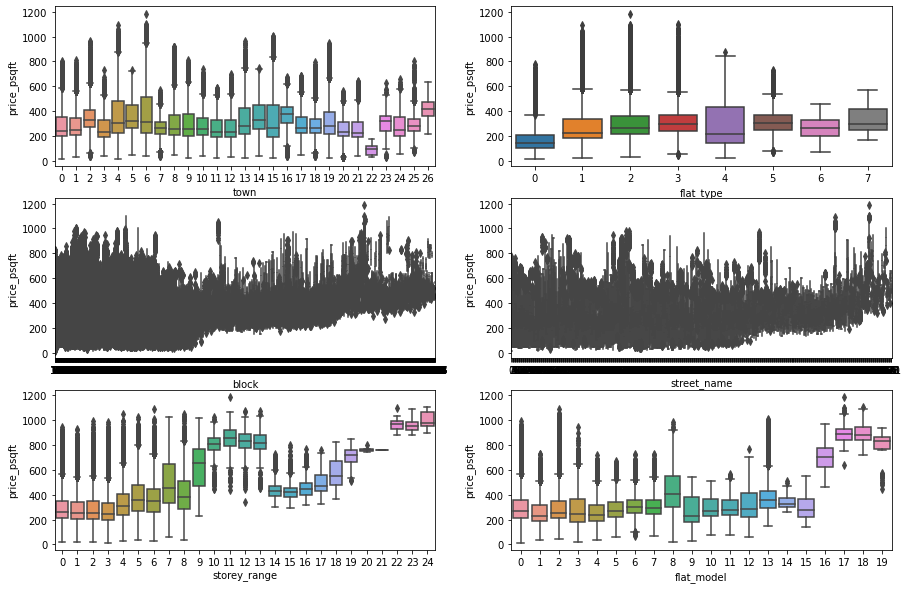

In [51]:
%time 
#here we use the backup df with the category names (after we have factorize/label encoded) so we have some better insight
categorical = ['town', 'flat_type', 'block', 'street_name', 'storey_range', 'flat_model']
fig, ax = plt.subplots(3, 2, figsize=(15, 10))
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x=var, y='price_psqft', data=df, ax=subplot)

<AxesSubplot:title={'center':'Mean Price For HDB Resale Per Annum'}, xlabel='date', ylabel='Mean Price Per Annum (S$)'>

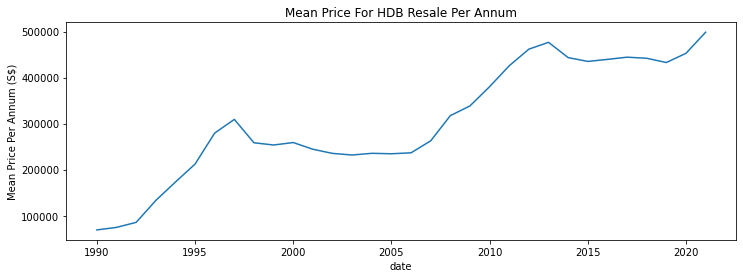

In [6]:
#reset index for next few plots with ts info
from matplotlib import rcParams
rcParams['figure.figsize'] = 30,16

df.reset_index(inplace=True)
fig, axs = plt.subplots(figsize=(12, 4))

# Set common labels
axs.set_xlabel('Year')
axs.set_ylabel('Mean Price Per Annum (S$)')

axs.set_title('Mean Price For HDB Resale Per Annum')

df.groupby(df["date"].dt.year)["resale_price"].mean().plot(rot=0, ax=axs)

In [ ]:
#reset index for next few plots with ts info
from matplotlib import rcParams
rcParams['figure.figsize'] = 30,16

df.reset_index(inplace=True)
fig, axs = plt.subplots(figsize=(12, 4))

# Set common labels
axs.set_xlabel('Year')
axs.set_ylabel('Count of Annual HDB Resales')

axs.set_title('Mean Price For HDB Resale Per Annum')

df.groupby(df["date"].dt.year)["resale_price"].count().plot(kind='bar',rot=0, ax=axs)

<AxesSubplot:title={'center':'Count of HDB Resale Per Annum'}, xlabel='date', ylabel='Count of Annual HDB Resales'>

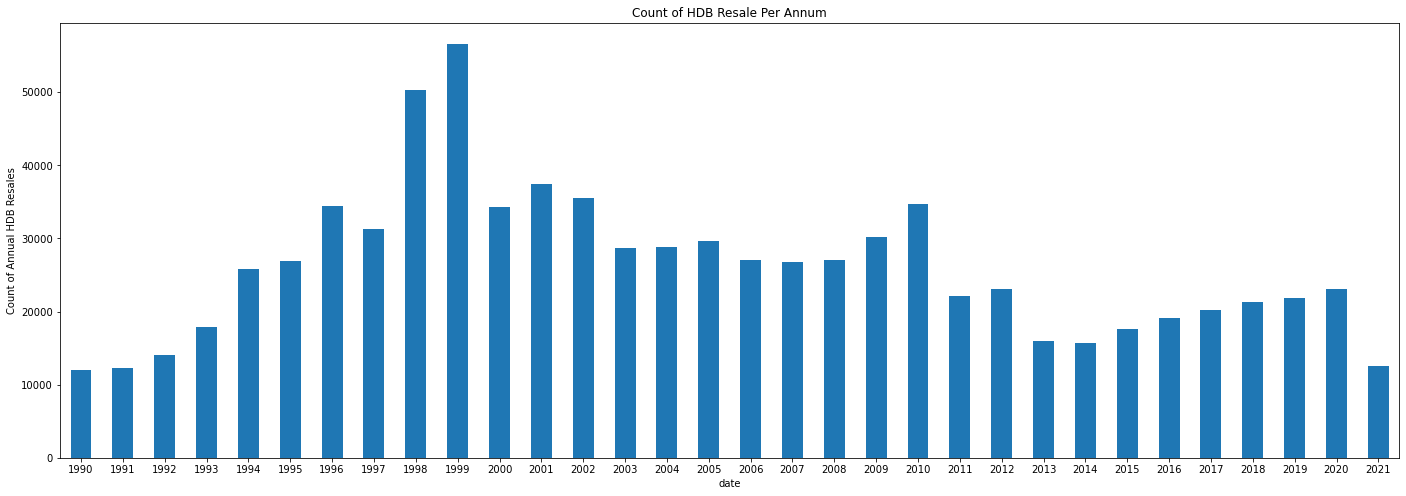

In [4]:
#reset index for next few plots with ts info
from matplotlib import rcParams
rcParams['figure.figsize'] = 45,24

df.reset_index(inplace=True)
fig, axs = plt.subplots(figsize=(24, 8))

# Set common labels
axs.set_xlabel('Year')
axs.set_ylabel('Count of Annual HDB Resales')

axs.set_title('Count of HDB Resale Per Annum')

df.groupby(df["date"].dt.year)["resale_price"].count().plot(kind='bar', rot=0, ax=axs)

Observation: Average HDB resale price has increased from under 100k in 1990 to 500k in 2020

In [7]:
#set index to date again
df.set_index('date', inplace=True)

Here we can see that the flats with the highest mean price psqft have the following criteria
1) town = pungoll

2) flat_type = 4rm/5rm/executive

3) storey_range ='46 to 48', '43 to 45' ,'49 to 51' < the highest floors >

4) flat_model = 'type s1','type s2', 'premium apartment loft'

rising_towns = df['town'] == 26
good_flat_type = df['flat_type'] == 2 | 3 | 7
high_storey = df['storey_range'] == 2 | 23 | 24
flat_model = df['flat_model'] == 17 | 18 | 19

# Correlations

This model will be supervised and we are trying to predict price_psqft

In [53]:
#lets find the correlations
df.corr(method='pearson')

,town,flat_type,block,street_name,storey_range,flat_model,lease_commence_date,remaining_lease,floor_area_sqft,price_psqft,resale_price
town,1.000000,0.189165,0.223789,0.590252,-0.011084,0.173877,0.391294,0.232839,0.207176,0.013082,0.109862
flat_type,0.189165,1.000000,0.173143,0.345459,0.051421,0.342094,0.354653,0.292034,0.855185,0.144958,0.573572
block,0.223789,0.173143,1.000000,0.516094,0.095903,0.309483,0.610161,0.343691,0.152210,0.296884,0.316354
street_name,0.590252,0.345459,0.516094,1.000000,0.069316,0.384696,0.797238,0.479122,0.377685,0.209856,0.360319
storey_range,-0.011084,0.051421,0.095903,0.069316,1.000000,0.053311,0.121844,0.004810,0.044260,0.222729,0.203515
flat_model,0.173877,0.342094,0.309483,0.384696,0.053311,1.000000,0.383499,0.239047,0.261029,0.176888,0.285758
lease_commence_date,0.391294,0.354653,0.610161,0.797238,0.121844,0.383499,1.000000,0.507520,0.354007,0.348325,0.463220
remaining_lease,0.232839,0.292034,0.343691,0.479122,0.004810,0.239047,0.507520,1.000000,0.375628,-0.280432,-0.015148
floor_area_sqft,0.207176,0.855185,0.152210,0.377685,0.044260,0.261029,0.354007,0.375628,1.000000,0.113866,0.614103
price_psqft,0.013082,0.144958,0.296884,0.209856,0.222729,0.176888,0.348325,-0.280432,0.113866,1.000000,0.827344


Checked again for the correlation figures against target variable and stacked in descending order

In [54]:
df_all_corr = df.corr().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_all_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_all_corr[df_all_corr['Feature 1'] == 'price_psqft']

,Feature 1,Feature 2,Correlation Coefficient
2,price_psqft,price_psqft,1.000000
13,price_psqft,resale_price,0.827344
49,price_psqft,lease_commence_date,0.348325
62,price_psqft,block,0.296884
75,price_psqft,storey_range,0.222729
77,price_psqft,street_name,0.209856
85,price_psqft,flat_model,0.176888
93,price_psqft,flat_type,0.144958
97,price_psqft,floor_area_sqft,0.113866
112,price_psqft,town,0.013082


In [55]:
#we test it out again but with resale price, as we might try to predict resale price instead
df_all_corr = df.corr().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_all_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_all_corr[df_all_corr['Feature 1'] == 'resale_price']

,Feature 1,Feature 2,Correlation Coefficient
10,resale_price,resale_price,1.000000
14,resale_price,price_psqft,0.827344
17,resale_price,floor_area_sqft,0.614103
24,resale_price,flat_type,0.573572
32,resale_price,lease_commence_date,0.463220
43,resale_price,street_name,0.360319
58,resale_price,block,0.316354
65,resale_price,flat_model,0.285758
82,resale_price,storey_range,0.203515
99,resale_price,town,0.109862


In [56]:
#find the range for remaining lease
print("max remaining_lease is: " +str(df['remaining_lease'].max()))
print("max remaining_lease is: " +str(df['remaining_lease'].min()))

max remaining_lease is: 96
max remaining_lease is: 44


In [28]:
df.corr()[['resale_price']].sort_values(by='resale_price', ascending=False)

,resale_price
resale_price,1.000000
price_psqft,0.827344
floor_area_sqft,0.614103
flat_type,0.573572
lease_commence_date,0.463220
street_name,0.360319
block,0.316354
flat_model,0.285758
storey_range,0.203515
town,0.109862


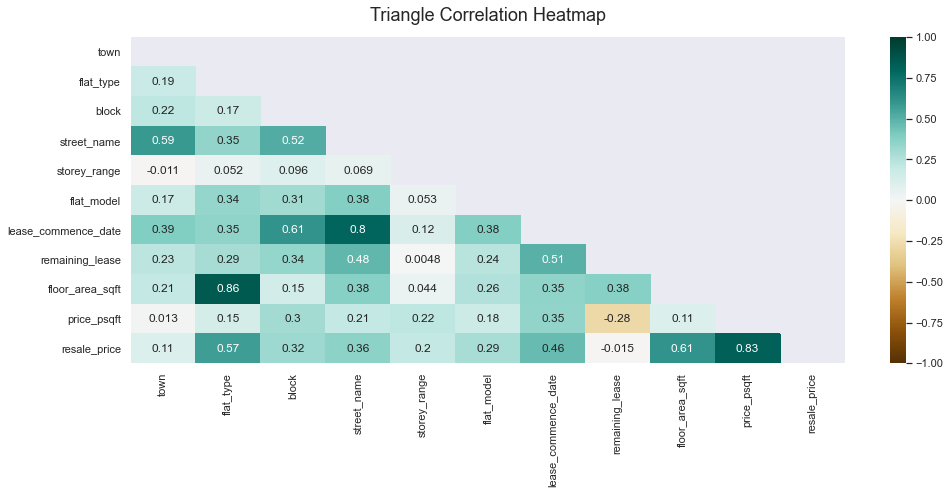

In [94]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))

heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

***
SCATTER PLOT ON HIGHLY CORRELATED FEATURES BETWEEN RESALE PRICE 
***

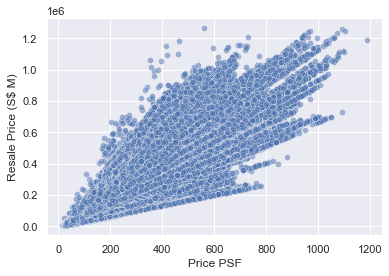

In [57]:
#
sns.set_theme(context='notebook')
sns.scatterplot(data=df, x=df['price_psqft'], y=df['resale_price'], alpha=0.5)
plt.xlabel('Price PSF')
plt.ylabel('Resale Price (S$ M)')
plt.savefig('resale_price_to_psf.png')
plt.show()

***
We see a linear relationship here. but definitely the data needs to be scaled before working the model
***

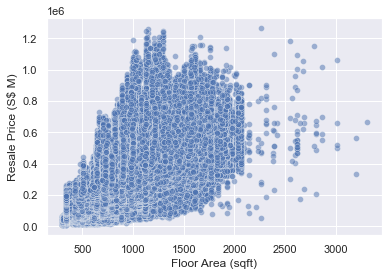

In [58]:
#
sns.set_theme(context='notebook')
sns.scatterplot(data=df, x=df['floor_area_sqft'], y=df['resale_price'], alpha=0.5)
plt.xlabel('Floor Area (sqft)')
plt.ylabel('Resale Price (S$ M)')
plt.savefig('floor_area_to_resale_price.png')
plt.show()

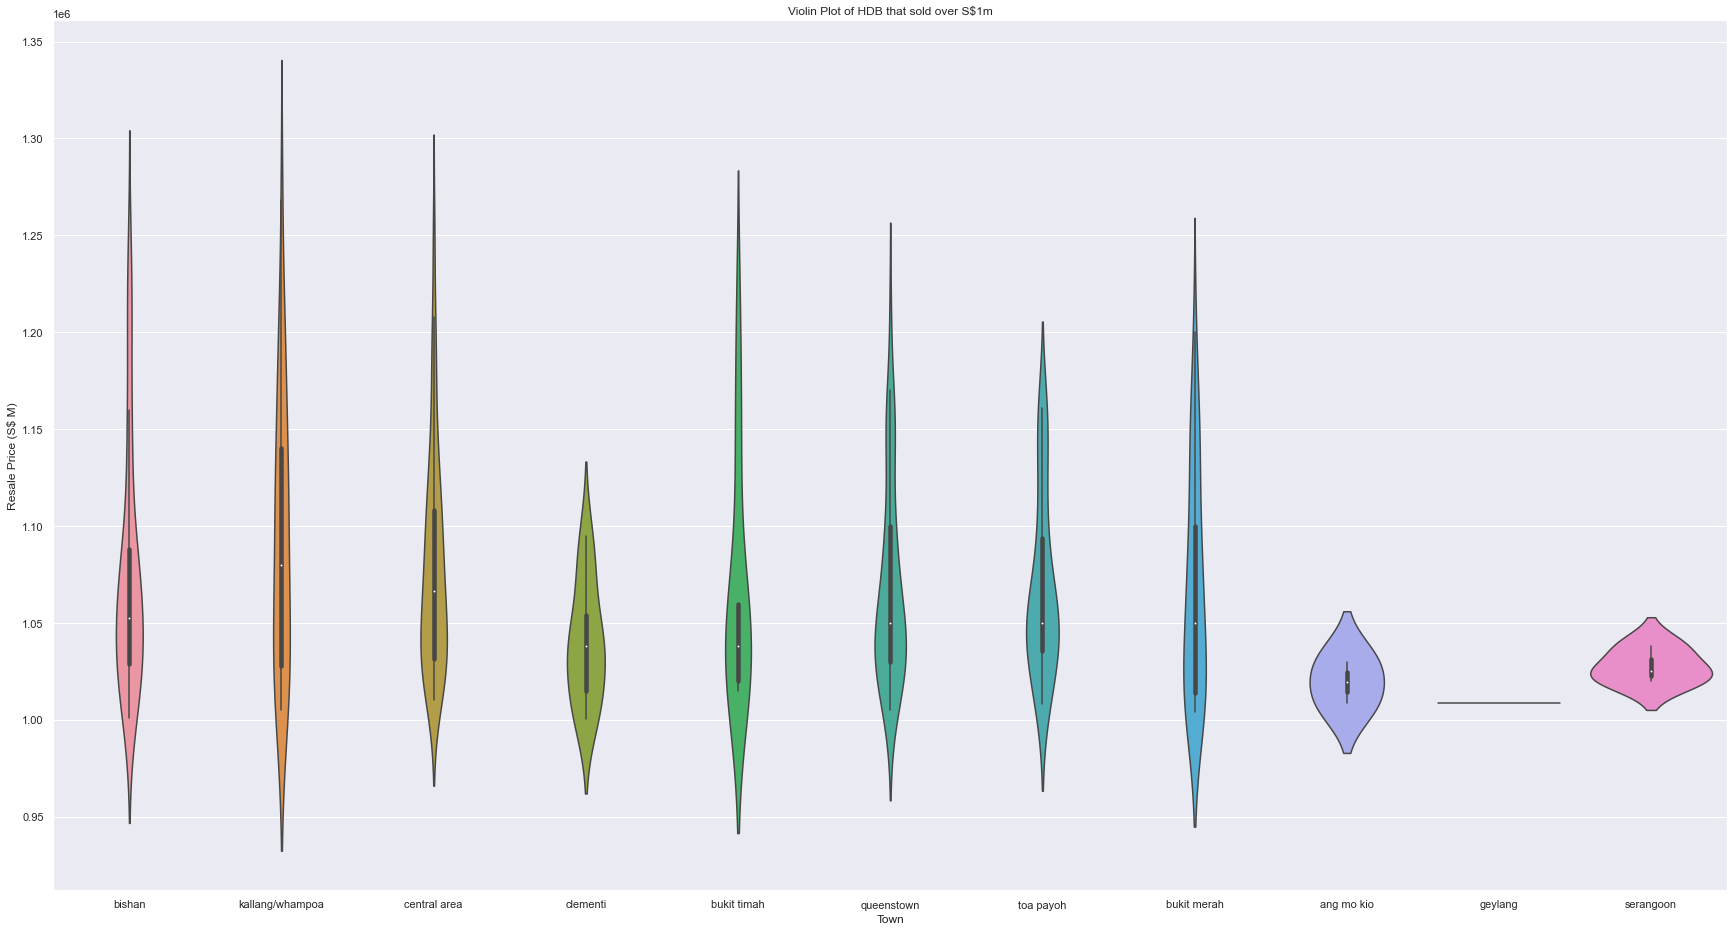

In [63]:
#here lets plot to see the expensive apartments over S$1,000,000
from matplotlib import rcParams
rcParams['figure.figsize'] = 30,16
sns.set_theme(context='notebook')
sns.violinplot(data=df, x=df_expensive['town'], y=df_expensive['resale_price'], alpha=0.5)
plt.title('Violin Plot of HDB that sold over S$1m')
plt.xlabel('Town')
plt.ylabel('Resale Price (S$ M)')
plt.savefig('town_to_price_analysis.png')
plt.show()

Observation here is that we have a large number of expensive flats in the areas close to center of Singapore

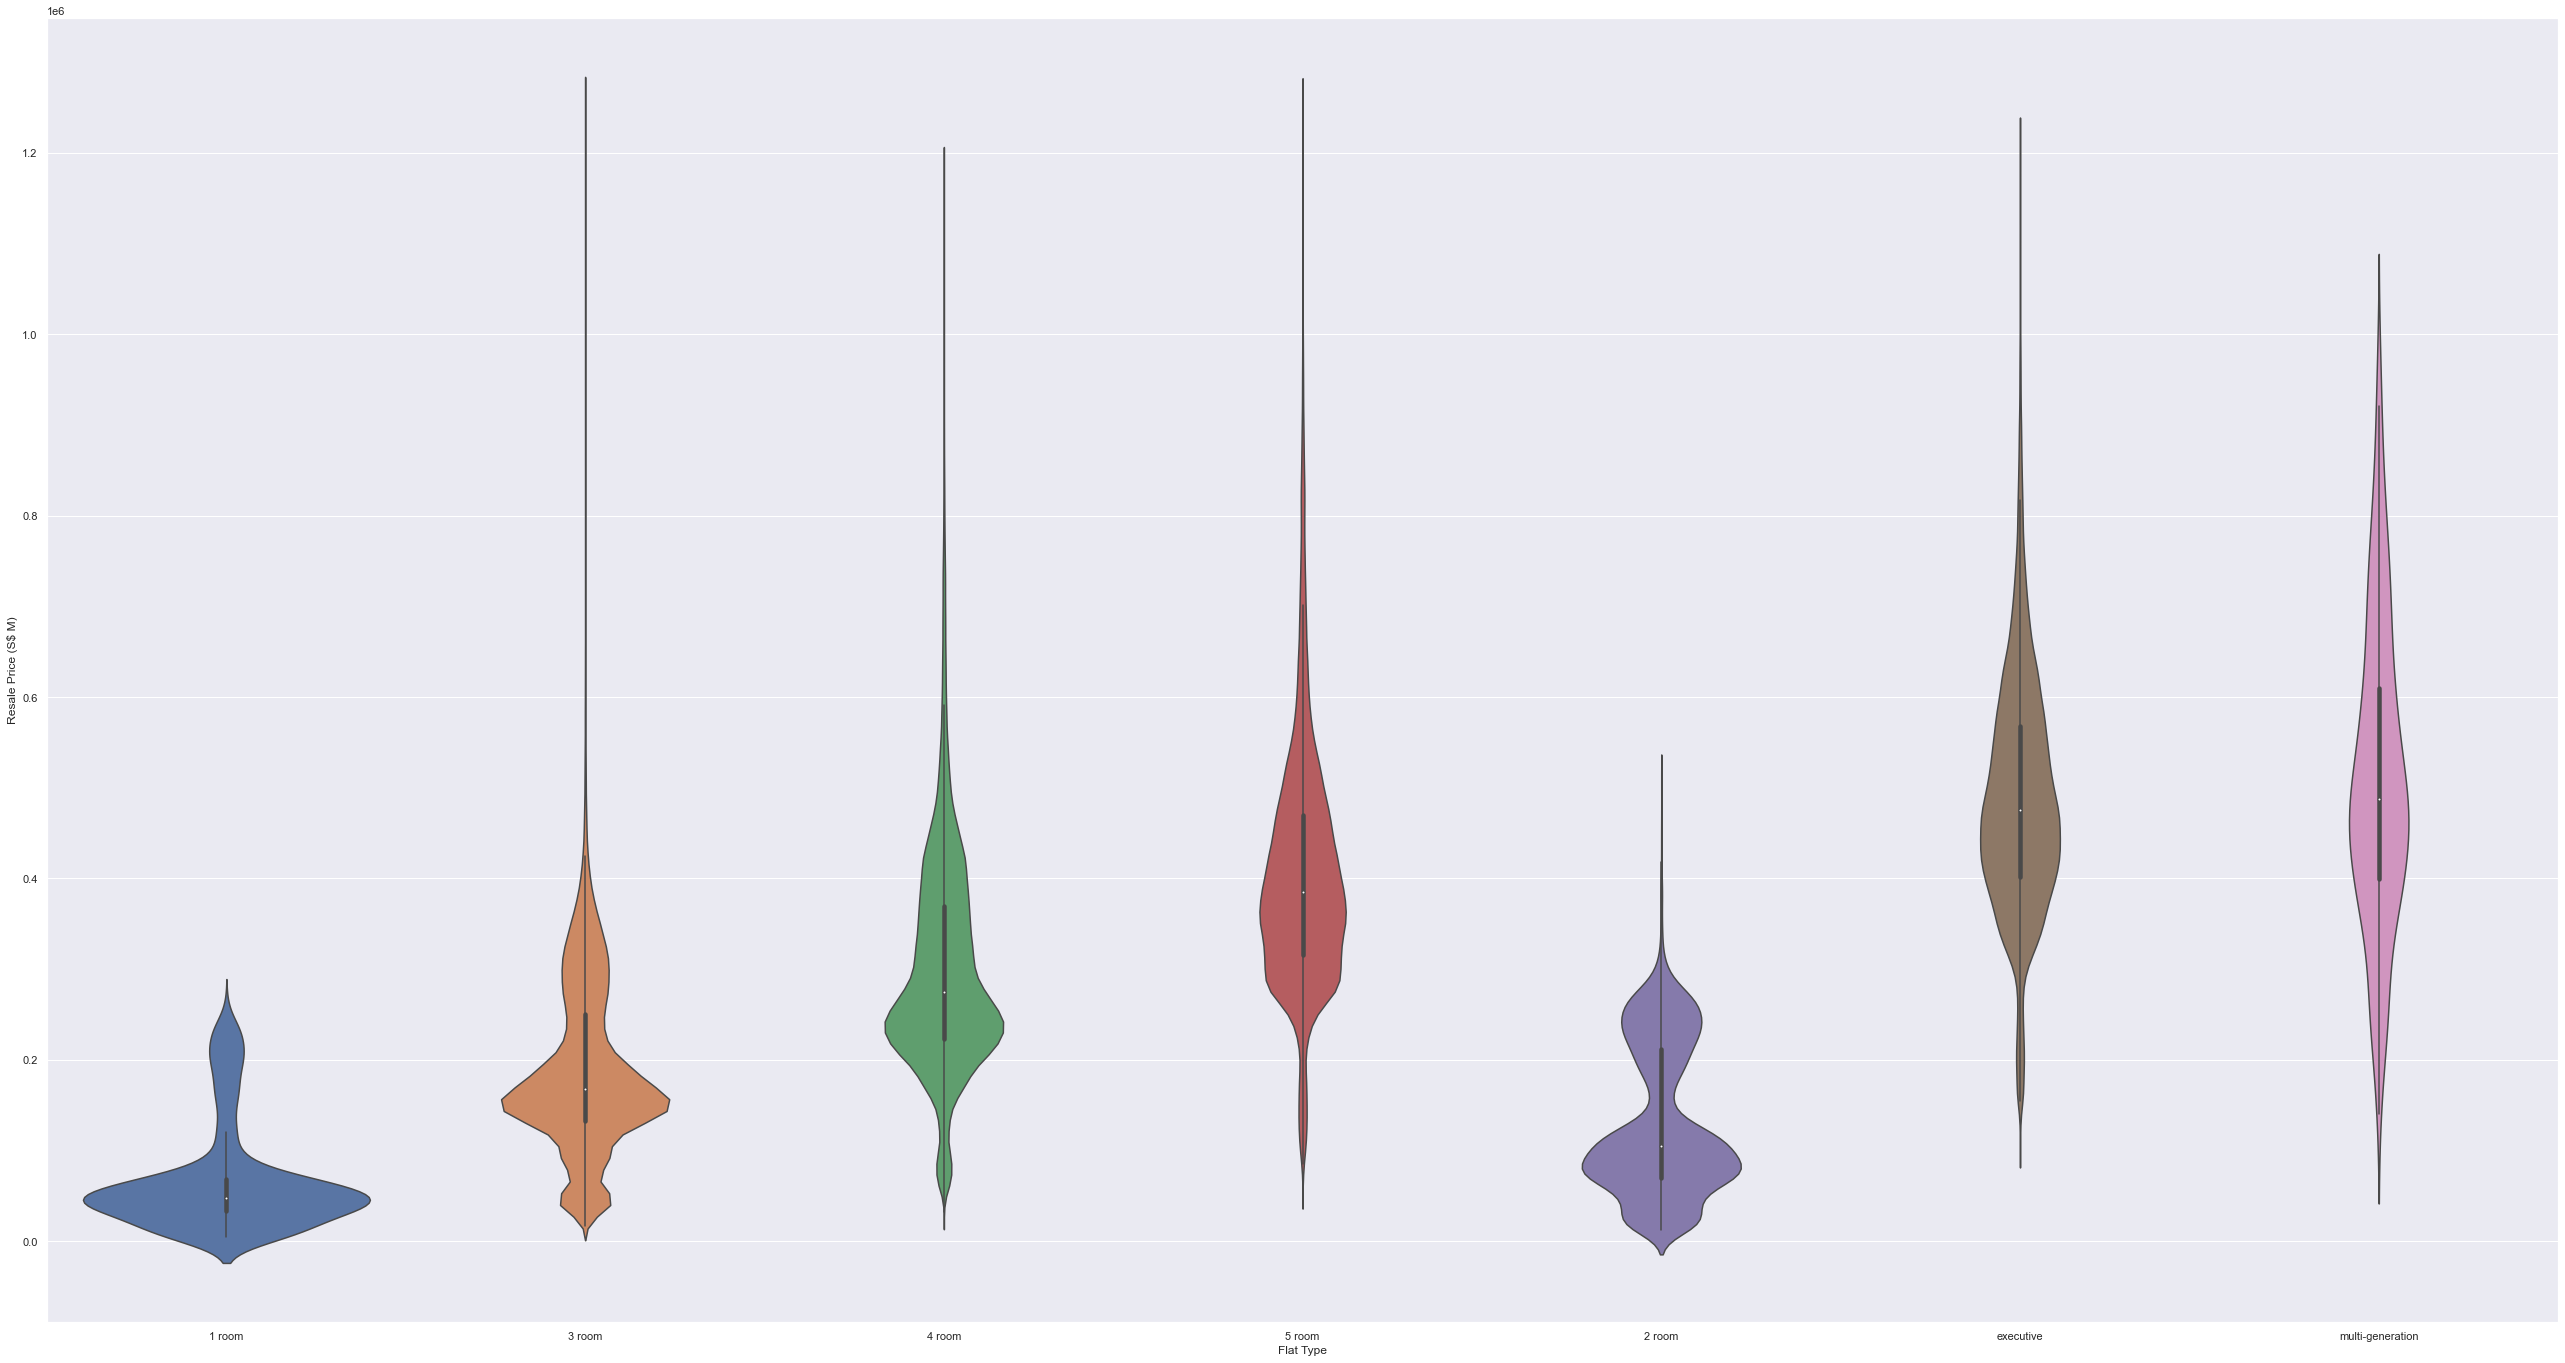

In [93]:
#
sns.set_theme(context='notebook')
sns.violinplot(data=df_cat, x=df_cat['flat_type'], y=df_cat['resale_price'], alpha=0.5)
plt.xlabel('Flat Type')
plt.ylabel('Resale Price (S$ M)')
plt.show()

Observation here is that 5 room, executive and multi-generation apartments command the highest resale price for the entire dataset

# Pre Processing Data for the Model

First we get the k nearest neighbour to score the original dataset. good performance is 88%

https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/

In [78]:
df.dtypes

town                     int64
flat_type                int64
block                    int64
street_name              int64
storey_range             int64
flat_model               int64
lease_commence_date      int64
remaining_lease          int64
floor_area_sqft        float64
resale_price           float64
dtype: object

In [68]:
df.head(1)

,date,town,flat_type,block,street_name,storey_range,flat_model,lease_commence_date,remaining_lease,floor_area_sqft,resale_price
0,1990-01-01,0,0,0,0,0,0,0,86,333.6809,9000.0


In [86]:
df = pd.read_pickle('hdb_final.pkl')

In [92]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

data = df.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define and configure the model
model = KNeighborsClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report model performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

/Users/lawrenceyim/opt/anaconda3/envs/hdb_mini_1/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/Users/lawrenceyim/opt/anaconda3/envs/hdb_mini_1/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
/Users/lawrenceyim/opt/anaconda3/envs/hdb_mini_1/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


Accuracy: 0.118 (0.001)


The KNN/cross validation model shows that the stock dataset achieved an accuracy of 11.8% for predictions. We should try to increase this by scaling the data

***
StandardScaler Transform
***

In [88]:
df.head(1)

,town,flat_type,block,street_name,storey_range,flat_model,lease_commence_date,remaining_lease,floor_area_sqft,price_psqft,resale_price
date,,,,,,,,,,,
1990-01-01,0,0,0,0,0,0,0,86,333.6809,26.971876,9000.0


The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1.
In case of multivariate data, this is done feature-wise (in other words independently for each column of the data).
Given the distribution of the data, each value in the dataset will have the mean value subtracted, and then divided by the standard deviation of the whole dataset (or feature in the multivariate case).

In [81]:
df.head(1)

,town,flat_type,block,street_name,storey_range,flat_model,lease_commence_date,remaining_lease,floor_area_sqft,price_psqft,resale_price
date,,,,,,,,,,,
1990-01-01,0,0,0,0,0,0,0,86,333.6809,26.971876,9000.0


In [89]:
#StandardScaler Transform
# perform a robust scaler transform of the dataset
trans = StandardScaler()
data = trans.fit_transform(df)

                  0             1             2             3             4  \
count  8.345080e+05  8.345080e+05  8.345080e+05  8.345080e+05  8.345080e+05   
mean  -7.057514e-15  1.479435e-13 -5.269395e-14 -8.136083e-15  3.406920e-14   
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00  1.000001e+00   
min   -1.612994e+00 -1.899438e+00 -1.024637e+00 -1.494890e+00 -1.015418e+00   
25%   -8.410370e-01 -1.010875e+00 -6.610494e-01 -7.795870e-01 -5.119708e-01   
50%   -6.908001e-02 -1.223117e-01 -3.018423e-01 -1.098034e-01 -8.523827e-03   
75%    8.315365e-01  7.662513e-01  2.829644e-01  8.135875e-01  4.949231e-01   
max    1.732153e+00  4.320504e+00  4.512409e+00  2.218182e+00  1.106731e+01   

                  5             6             7             8             9  
count  8.345080e+05  8.345080e+05  8.345080e+05  8.345080e+05  8.345080e+05  
mean   2.880887e-13 -2.346387e-13 -1.939827e-13  1.345993e-14 -9.198353e-14  
std    1.000001e+00  1.000001e+00  1.000001e+00  1.000

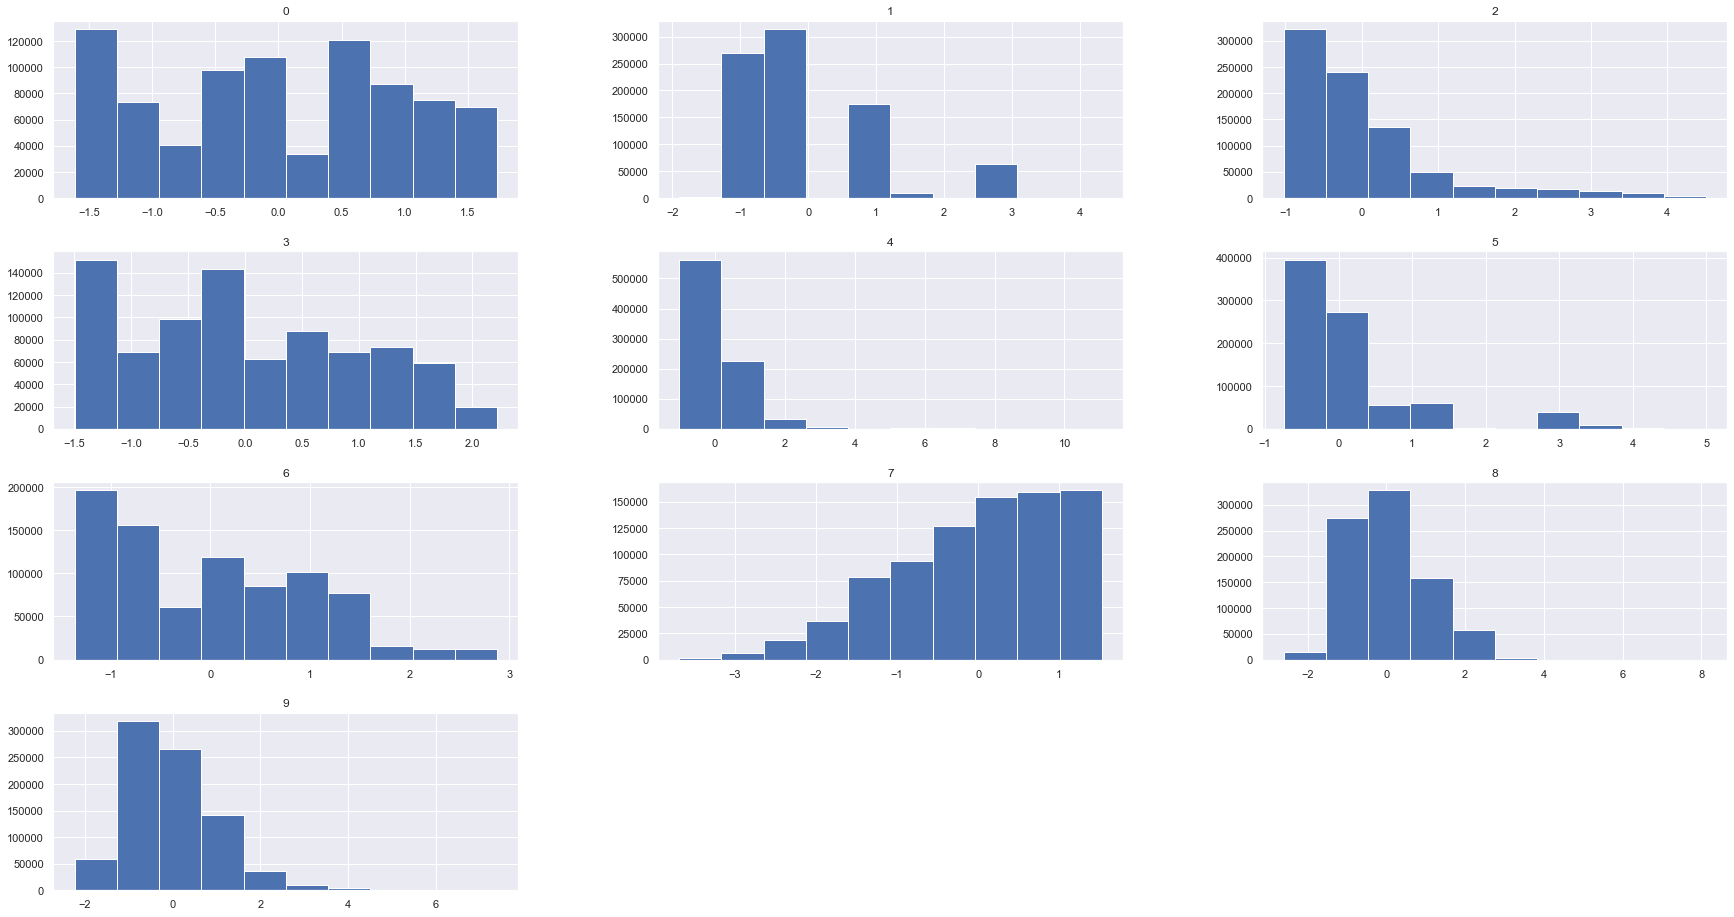

In [90]:
# retrieve just the numeric input values
data = df.values[:, :-1]
# perform a robust scaler transform of the dataset
trans = StandardScaler()
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# summarize
print(dataset.describe())
# histograms of the variables
dataset.hist()
plt.show()

In [92]:
#save xvals to a pickle
dataset.to_pickle('hdb_model_xvals.pkl')

k-nearest neighbor algorithm with default hyperparameters and evaluate it using repeated stratified k-fold cross-validation

In [ ]:
from sklearn.pipeline import Pipeline

data = dataset.values
target_knn = df.values
# separate into input and output columns
X, y = data[:, :-1], target_knn[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = StandardScaler()
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

# Model

***
Single Linear Regression Model - First model uses floor area to predict price. using scaled data
***

In [93]:
df = pd.read_pickle('hdb_final.pkl')
df.columns

Index(['town', 'flat_type', 'block', 'street_name', 'storey_range',
       'flat_model', 'lease_commence_date', 'remaining_lease',
       'floor_area_sqft', 'price_psqft', 'resale_price'],
      dtype='object')

In [100]:
Y = df.resale_price
X = df[["floor_area_sqft"]]
#split to train,test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=123456)


sc = StandardScaler()
scaler = sc.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, Y_train)


# Make predictions using the testing set
housing_y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(Y_test, housing_y_pred))
print('root_mean_squared error of is: ',np.sqrt(mean_squared_error(Y_test, housing_y_pred)))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, housing_y_pred))

Coefficients: 
 [93346.6301072]
Mean squared error: 14283418682.79
root_mean_squared error of is:  119513.25735161666
Coefficient of determination: 0.38


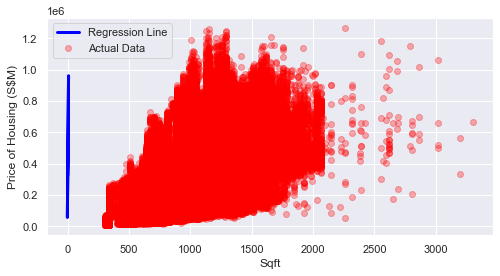

In [101]:
# let's visualize our results
plt.rcParams['figure.figsize'] = 8, 4
plt.plot(X_test, housing_y_pred, color='blue', linewidth=3, label='Regression Line')
plt.scatter(X, Y, c='red', label='Actual Data', alpha=0.3)

plt.xlabel('Sqft')
plt.ylabel("Price of Housing (S$M)")
plt.legend()
plt.show()

Generally the larger the price of the house the higher the total resale value. Based on the regression line we can assume this model is very inaccurate

#simple linear regression without scaled data. predicting area sqft to price

In [103]:
Y2 = df.resale_price
X2 = df[["floor_area_sqft"]]
#split to train,test
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.2, random_state=42)

regr2 = linear_model.LinearRegression()

# Train the model using the training sets
regr2.fit(X_train2, Y_train2)


# Make predictions using the testing set
housing_y_pred = regr2.predict(X_test2)

# The coefficients
print('Coefficients: \n', regr2.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(Y_test2, housing_y_pred2))
print('root_mean_squared error of is: ',np.sqrt(mean_squared_error(Y_test2, housing_y_pred2)))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y_test2, housing_y_pred2))

Coefficients: 
 [332.90852389]
Mean squared error: 14330569428.04
root_mean_squared error of is:  119710.35639426568
Coefficient of determination: 0.38


/Users/lawrenceyim/opt/anaconda3/envs/hdb_mini_1/lib/python3.7/site-packages/IPython/core/pylabtools.py:134: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


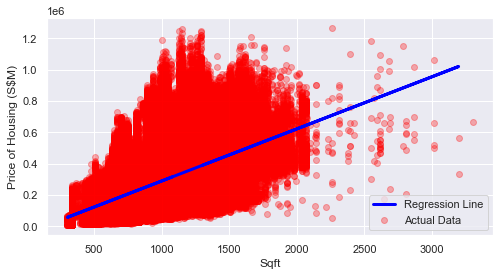

In [104]:
plt.plot(X_test2, housing_y_pred2, color='blue', linewidth=3, label='Regression Line')
plt.scatter(X2, Y2, c='red', label='Actual Data', alpha=0.3)

plt.xlabel('Sqft')
plt.ylabel("Price of Housing (S$M)")
plt.legend()
plt.show()

***
Observation: Scaling the data like in the first model decreased the rmse by $200. but still both models are not very usable. low r2 and high rmse
***    

We see here that the r2 is low so we should consider a multivariate linear regression with scaled data for improved accuracy. We did not include price psqft since it was imputed from the target variable

In [105]:
df.columns

Index(['town', 'flat_type', 'block', 'street_name', 'storey_range',
       'flat_model', 'lease_commence_date', 'remaining_lease',
       'floor_area_sqft', 'price_psqft', 'resale_price'],
      dtype='object')

In [107]:
features_multi1 = ['town', 'flat_type', 'block', 'street_name', 'storey_range',
       'flat_model', 'lease_commence_date', 'remaining_lease',
       'floor_area_sqft']
target_multi1 = 'resale_price'

X_multi1 = df[features_multi1].values.reshape(-1, len(features_multi1))
y_multi1 = df[target_multi1].values

# splitting the data
x_train1, x_test1, y_train1, y_test1 = train_test_split(X_multi1, y_multi1, test_size = 0.2, random_state = 42)
sc = StandardScaler()
scaler = sc.fit(x_train1)
x_train1 = scaler.transform(x_train1)
x_test1 = scaler.transform(x_test1)


#Create Linear regression object
LR1 = LinearRegression()
# fitting the training data
LR1.fit(x_train1,y_train1)

y_prediction1 =  LR1.predict(x_test1)

print(LR1.intercept_, LR1.coef_)
# predicting the accuracy score
score=r2_score(y_test1,y_prediction1)
print('r2 score is: ',score)
print('mean_sqrd_error is: ',mean_squared_error(y_test1,y_prediction1))
print('root_mean_squared error of is: ',np.sqrt(mean_squared_error(y_test1,y_prediction1)))
print('Coefficient of determination: %.2f'
      % r2_score(y_test1, y_prediction1))

299143.5133816703 [-14897.72266597   -145.89490753  20680.6633489   -4297.27559445
  16657.0047746    7815.79075068  66080.55915798 -75816.34490248
  97199.1723575 ]
r2 score is:  0.6630376192174363
mean_sqrd_error is:  7798175702.635077
root_mean_squared error of is:  88307.28000926695
Coefficient of determination: 0.66


In [24]:
from sklearn.ensemble import RandomForestRegressor

Random Forest is a flexible, easy to use machine learning algorithm that produces great results most of the time with minimum time spent on hyper-parameter tuning. It has gained popularity due to its simplicity and the fact that it can be used for both classification and regression tasks. In this article, I will present in details the Random Forest Regression model.

In [27]:
features_multi2 = ['town', 'flat_type', 'block', 'street_name', 'storey_range',
       'flat_model', 'lease_commence_date', 'remaining_lease',
       'floor_area_sqft']
target_multi2 = 'resale_price'

X_multi2 = df[features_multi2].values.reshape(-1, len(features_multi2))
y_multi2 = df[target_multi2].values

# splitting the data
x_train2, x_test2, y_train2, y_test2 = train_test_split(X_multi2, y_multi2, test_size = 0.2, random_state = 42)
sc = StandardScaler()
scaler = sc.fit(x_train2)
x_train2 = scaler.transform(x_train2)
x_test2 = scaler.transform(x_test2)


#Create Linear regression object
RFR = RandomForestRegressor(verbose=10,n_jobs=-1)
# fitting the training data
RFR.fit(x_train2,y_train2)

y_prediction2 =  RFR.predict(x_test2)

#print(LR1.intercept_, LR1.coef_)
# The coefficients
print('Coefficients: \n', RFR.coef_)
# predicting the accuracy score
score=r2_score(y_test2,y_prediction2)
print('r2 score is: ',score)
print('mean_sqrd_error is: ',mean_squared_error(y_test2,y_prediction2))
print('root_mean_squared error of is: ',np.sqrt(mean_squared_error(y_test2,y_prediction2)))
print('Coefficient of determination: %.2f'
      % r2_score(y_test1, y_prediction2))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100
building tree 4 of 100building tree 5 of 100
building tree 6 of 100


building tree 7 of 100building tree 8 of 100

building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100building tree 13 of 100

building tree 14 of 100
building tree 15 of 100
building tree 16 of 100


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   14.4s


building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   14.7s


building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   34.2s


building tree 33 of 100
building tree 35 of 100building tree 34 of 100

building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   45.3s


building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100


[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   58.0s


building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100building tree 62 of 100

building tree 63 of 100


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  1.2min


building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100


[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:  1.7min


building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100
building tree 91 of 100


[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  2.1min


building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=-1)]: Done  96 out of 100 | elapsed:  2.4min remaining:    5.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.5min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    1.3s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    3.4s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    3.6s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    6.4s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    8.1s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    9.6s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:   11.0s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:   13.2s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:   15.8s
[Parallel(n_jobs=8)]: Done  96 out of 100 | elapsed:   17.5s remaining:    0.7s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:   18.0s finished


AttributeError: 'RandomForestRegressor' object has no attribute 'coef_'

Score printed again to be clearer

In [111]:
# predicting the accuracy score
score=r2_score(y_test1,y_prediction1)
print('r2 score is: ',score)
print('mean_sqrd_error is: ',mean_squared_error(y_test1,y_prediction1))
print('root_mean_squared error of is: ',np.sqrt(mean_squared_error(y_test1,y_prediction1)))
print('Coefficient of determination: %.2f'
      % r2_score(y_test1, y_prediction1))

r2 score is:  0.9747317535428622
mean_sqrd_error is:  584772178.759615
root_mean_squared error of is:  24182.063161765476
Coefficient of determination: 0.97


In [130]:
#Here we will take a sample to see how good the prediction is
df.sample(n=1, random_state=1245678)

,town,flat_type,block,street_name,storey_range,flat_model,lease_commence_date,remaining_lease,floor_area_sqft,price_psqft,resale_price
date,,,,,,,,,,,
2020-09-01,18,5,944,196,0,7,20,66,1657.6406,446.417637,740000.0


#Let's make one prediction of HDB flat resale price when: 

town =   18: 'tampines'

flat_type =  5: 'executive'

block =  944: 'blk 942'

street_name =   196: 'tampines ave 5'

storey_range =  0: '10 to 12'

flat_model =  7: 'maisonette'

lease_commence_date =   20: '1992-01-01'

remaining_lease (at time of transasction) = 66

floor_area_sqft = 1657.6

In [131]:
x_pred = np.array([18, 5, 944, 196, 0, 7, 20, 66, 1650])
x_pred = x_pred.reshape(-1, len(features_multi1))

prediction with randomforestregression model

In [132]:
RFR.predict(x_pred) #- predicted price is SGD 850k. 14% higher than actual value of S$740k

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done  96 out of 100 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


array([850383.76])

In [134]:
850/740

1.1486486486486487

***
Second Multivariate linear regression with only top 3 important features based on randomforest model in important features
***

In [138]:
features2 = ['remaining_lease', 'lease_commence_date', 'floor_area_sqft']
target = 'resale_price'

X_multi2 = df[features2].values.reshape(-1, len(features2))
y_multi2 = df[target].values

#split the data to train/test
x_train2, x_test2, y_train2, y_test2 = train_test_split(X_multi2, y_multi2, test_size=0.2, random_state=42)

#Create Linear regression object
RFR = RandomForestRegressor(verbose=10,n_jobs=-1)

# fitting the training data
RFR.fit(x_train2,y_train2)
y_prediction2 =  RFR.predict(x_test2)
# predicting the accuracy score
score2=r2_score(y_test2,y_prediction2)
print('r2 score is ',score2)
print('mean_sqrd_error is==',mean_squared_error(y_test2,y_prediction2))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test2,y_prediction2)))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100building tree 4 of 100

building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100


[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.3s


building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.6s


building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.1s


building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100building tree 43 of 100

building tree 44 of 100building tree 45 of 100



[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.8s


building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100building tree 51 of 100

building tree 52 of 100
building tree 53 of 100
building tree 54 of 100


[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   14.4s


building tree 55 of 100building tree 56 of 100

building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   17.5s


building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100


[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   22.7s


building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82 of 100
building tree 83 of 100
building tree 84 of 100
building tree 85 of 100
building tree 86 of 100
building tree 87 of 100
building tree 88 of 100
building tree 89 of 100
building tree 90 of 100


[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   28.6s


building tree 91 of 100
building tree 92 of 100
building tree 93 of 100
building tree 94 of 100
building tree 95 of 100
building tree 96 of 100
building tree 97 of 100
building tree 98 of 100
building tree 99 of 100building tree 100 of 100



[Parallel(n_jobs=-1)]: Done  96 out of 100 | elapsed:   33.3s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   35.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done   9 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.9s
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Done  45 tasks      | elapsed:    1.3s
[Parallel(n_jobs=8)]: Done  56 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done  69 tasks      | elapsed:    2.0s
[Parallel(n_jobs=8)]: Done  82 tasks      | elapsed:    2.3s


r2 score is  0.8924905895135017
mean_sqrd_error is== 2488044127.398966
root_mean_squared error of is== 49880.297988273545


[Parallel(n_jobs=8)]: Done  96 out of 100 | elapsed:    2.6s remaining:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    2.7s finished


In [139]:
# predicting the accuracy score
score2=r2_score(y_test2,y_prediction2)
print('r2 score is ',score2)
print('mean_sqrd_error is==',mean_squared_error(y_test2,y_prediction2))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test2,y_prediction2)))

r2 score is  0.8924905895135017
mean_sqrd_error is== 2488044127.398966
root_mean_squared error of is== 49880.297988273545


*** 
multivariate linear regression based on linear regression
***
flat_type, storey_range, flat_model

# Compare feature importance

***
First we do it with a randomforestregression to compare coef of features
***

Feature importance scores can provide insight into the dataset

Feature importance scores can provide insight into the model. 

Feature importance can be used to improve a predictive model. 

https://mljar.com/blog/feature-importance-in-random-forest/

Feature importances are provided by the fitted attribute feature_importances_ and they are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree.

In [140]:
import sklearn
print(sklearn.__version__) #needs more than v0.22

0.23.2


In [141]:
df_cat = pd.read_pickle('hdb_1990_2021_categorical_data.pkl')
df_cat.columns

Index(['town', 'flat_type', 'block', 'street_name', 'storey_range',
       'flat_model', 'lease_commence_date', 'remaining_lease',
       'floor_area_sqft', 'price_psqft', 'resale_price'],
      dtype='object')

In [148]:
df_cat.dtypes

town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
flat_model              object
lease_commence_date     object
remaining_lease          int64
floor_area_sqft        float64
price_psqft            float64
resale_price           float64
dtype: object

In [160]:
#price psqft not used here since it was imputed from the target variable
Y_rf = df[['resale_price']]
X_rf = df[['town', 'flat_type', 'block', 'street_name', 'storey_range',
       'flat_model', 'lease_commence_date', 'remaining_lease',
       'floor_area_sqft']]

In [161]:
#take samples for the rf model
#X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(df[features_multi1], df[['resale_price']], test_size=0.5, stratify=df[['resale_price']], random_state=42)
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, Y_rf, test_size=0.2, stratify=None, random_state=42)

In [162]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
#randomforestregressor used as it can handle continuous data for Y https://stackoverflow.com/questions/47942417/valueerror-unknown-label-type-continuous-when-applying-random-forrest
#lets give it 100 decision trees with out of bag score true
rf = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42) #oob score is true so in future when we want we can validate the model. we use oob score vs validate score of the model to see how representative our dataset is https://stats.stackexchange.com/questions/95818/what-is-a-good-oob-score-for-random-forests-with-sklearn-three-class-classifica/168643
rf.fit(X_train_rf, y_train_rf)

/Users/lawrenceyim/opt/anaconda3/envs/hdb_mini_1/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(oob_score=True, random_state=42)

In [163]:
#gets array of feature importance
rf.feature_importances_

array([0.05467237, 0.10717015, 0.01375648, 0.04074851, 0.01104176,
       0.02111332, 0.20137535, 0.20869662, 0.34142543])

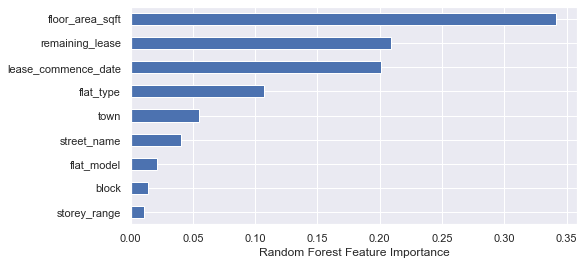

In [164]:
#lets look at the features in a barchart, as its easier to understand if the array is visualized
features = pd.Series(rf.feature_importances_, index=X_rf.columns)
feature_list = features.sort_values(ascending=False).index.to_list()
features.sort_values(ascending=True).plot(kind='barh')
plt.xlabel("Random Forest Feature Importance")
plt.show()

In [ ]:
df.columns

***
Feature selection using chi score (ANOVA f_Classification to handle numeric/categorical data
***

In [34]:
#will need to use a sampledf here as past experience shows calculations are taking too long
sampled_df = df.sample(n=1000, random_state=42).astype('int')

In [35]:
features_multi1 = ['town', 'flat_type', 'block', 'street_name', 'storey_range',
       'flat_model', 'lease_commence_date', 'remaining_lease',
       'floor_area_sqft']
target_multi1 = 'resale_price'

#X_multi1 = df[features_multi1]
X_multi_feat = sampled_df[features_multi1].values.reshape(-1, len(features_multi1))
y_multi1_feat = sampled_df[target_multi1].values.astype('int') #sklearn requires the y to be an int

In [36]:
%time
# Feature extraction to select 4 best features
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X_multi_feat, y_multi1_feat)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X_multi_feat)
# Summarize selected features
print(features[0:5,:])

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 52.9 µs
[  2395.001    400.223 202423.42   58706.806   1073.613   2009.943
   5162.453    547.215  51708.434]
[[ 595   24    5 1302]
 [ 266  174   31 1334]
 [ 427  372   31 1302]
 [ 395  352   26 1140]
 [  74  255    9 1108]]


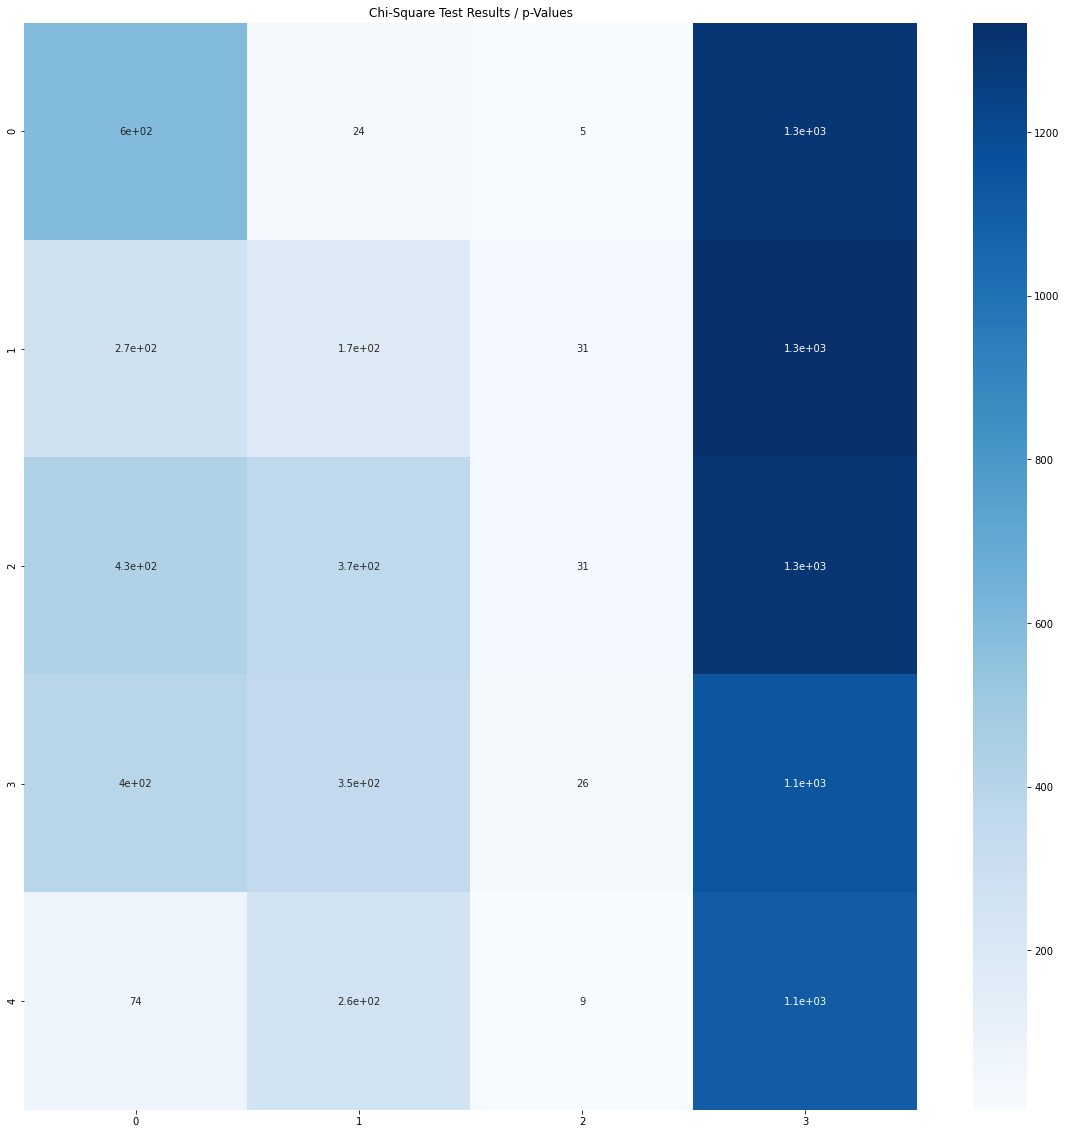

In [37]:
# Plotting a heatmap
fig = plt.figure(figsize=(20,20))
sns.heatmap(features[0:5,:], annot=True, cmap='Blues')
plt.title('Chi-Square Test Results / p-Values')
plt.show()

In [38]:
%time
# Resultant Dataframe will be a dataframe where the column names and Index will be the same
# This is a matrix similar to correlation matrix which we get after df.corr()
# Initialize the values in this matrix with 0
resultant = pd.DataFrame(data=[(0 for i in range(len(sampled_df.columns))) for i in range(len(sampled_df.columns))], 
                         columns=list(sampled_df.columns))
resultant.set_index(pd.Index(list(sampled_df.columns)), inplace = True)

# Finding p_value for all columns and putting them in the resultant matrix
for i in list(sampled_df.columns):
    for j in list(sampled_df.columns):
        if i != j:
            chi2_val, p_val = chi2(np.array(sampled_df[i]).reshape(-1, 1), np.array(sampled_df[j]).reshape(-1, 1))
            resultant.loc[i,j] = p_val
print(resultant)

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 10 µs
                              town      flat_type         block   street_name  \
town                  0.000000e+00   1.423225e-59  0.000000e+00  0.000000e+00   
flat_type             6.186579e-07   0.000000e+00  1.000000e+00  9.906912e-01   
block                 0.000000e+00   0.000000e+00  0.000000e+00  0.000000e+00   
street_name           0.000000e+00   0.000000e+00  0.000000e+00  0.000000e+00   
storey_range          4.204422e-17   4.583106e-07  6.999006e-65  7.509181e-51   
flat_model           4.893419e-136  2.864355e-201  0.000000e+00  0.000000e+00   
lease_commence_date   0.000000e+00   0.000000e+00  0.000000e+00  0.000000e+00   
remaining_lease       7.062080e-52   1.925316e-52  7.847514e-11  5.121240e-27   
floor_area_sqft       0.000000e+00   0.000000e+00  0.000000e+00  0.000000e+00   
price_psqft           0.000000e+00  2.868641e-286  0.000000e+00  0.000000e+00   
resale_price          0.000000e+00   0.0000

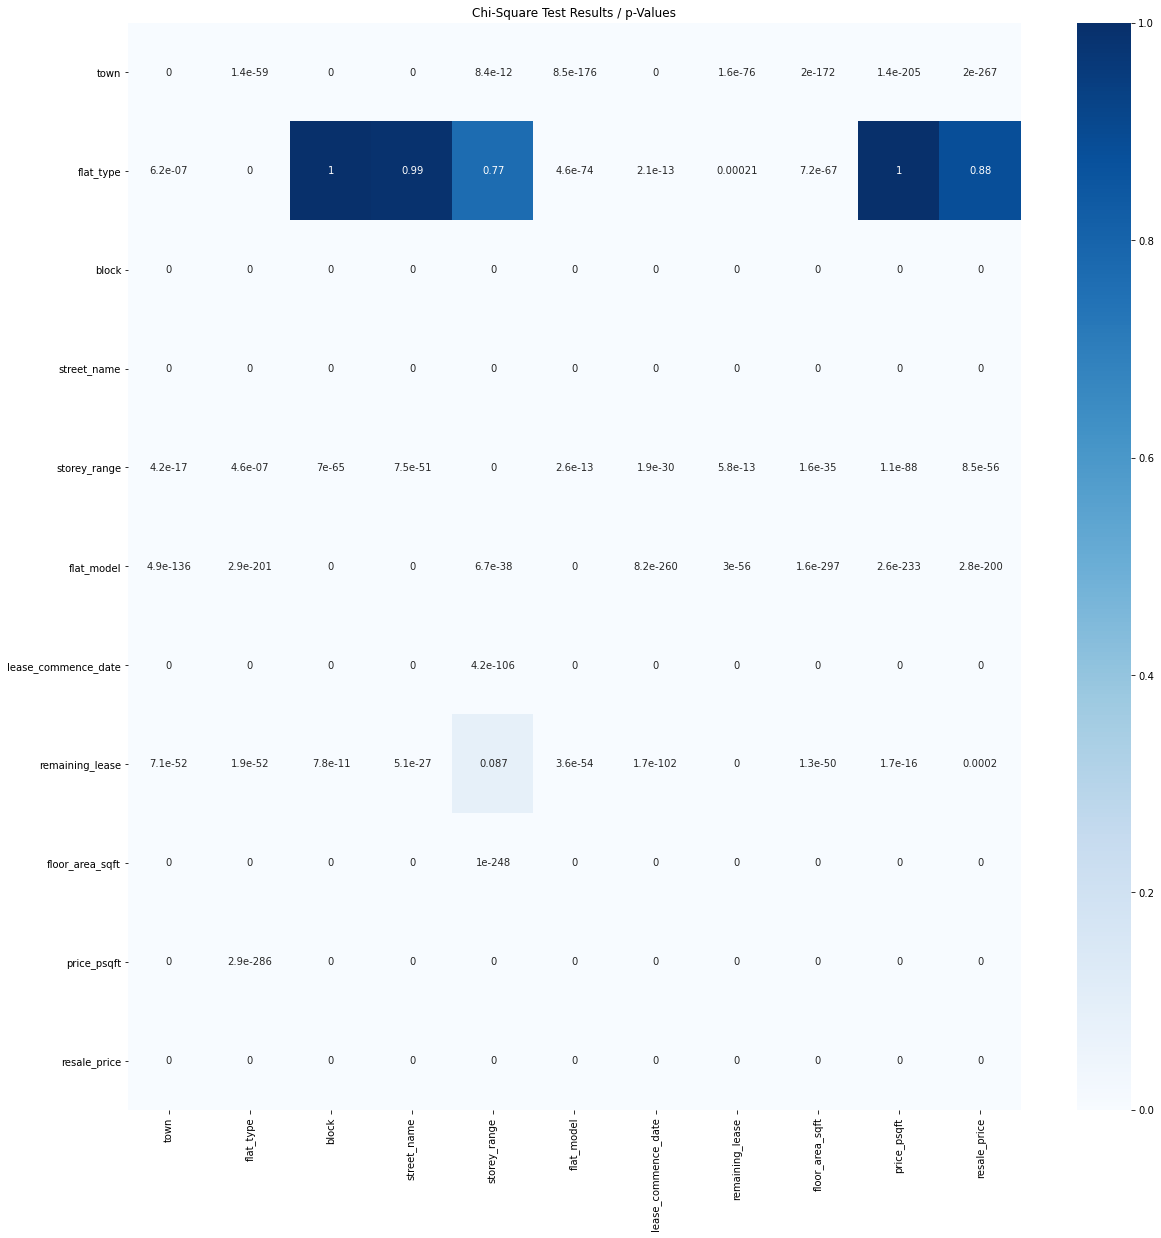

In [39]:
# Plotting a heatmap
fig = plt.figure(figsize=(20,20))
sns.heatmap(resultant, annot=True, cmap='Blues')
plt.title('Chi-Square Test Results / p-Values')
plt.show()

Observations :

1) It can be seen that the diagonal has values equal to 0 as they relate to each other

2) To resale price, only remaining_lease and town have low p-values

3) On the other hand it can be seen that there is inconclusive evidence that many of the other features are correlated or not. the model would work better with less feature columns

***
RFE with logistic regression to select top 3 features
***

In [40]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [41]:
# Feature extraction
logreg = LogisticRegression(solver='liblinear')
rfe = RFE(logreg, 3)
fit = rfe.fit(X_multi_feat, y_multi1_feat)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 3
Selected Features: [False  True False False  True  True False False False]
Feature Ranking: [3 1 6 5 1 1 2 4 7]


In [42]:
df.head(1)

,town,flat_type,block,street_name,storey_range,flat_model,lease_commence_date,remaining_lease,floor_area_sqft,price_psqft,resale_price
date,,,,,,,,,,,
1990-01-01,0,0,0,0,0,0,0,86,333.6809,26.971876,9000.0


Observations :

1) The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain. It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.    
    
2) It is telling us that the best 3 features to try are flat_type, storey_range, flat_model. 

3) It was not used in the end because in the model it had a low r2 and high RMSE


# Improvements we can make

The features were abit too basic. So if we had more time and better understanding we feel that we could scrape additional data and create new features 

Geospatial data could be included such as long/lat info and plot the proximity to the following:

1) Proximity to CBD (might bump up prices due to low transit time to work)

2) Proxmity to MRT stations (same as above, but also just reduces transit time in general for home owners)

3) Proximity to schools (influences buying decision for parents who want to put their kids to certain schools)

With the above and more well thought out features, we might actually be able to improve the model

`We could work on the scaling to increase accuracy of the model`

We could work on making new features, by grouping a few of the features